In [54]:
#import pandas as pd
import xarray as xr

import scipy.io as io
import scipy.stats as st
from scipy.stats import pearsonr
from scipy.stats import ks_2samp
from scipy.stats import skew
from scipy.stats import wasserstein_distance
from sklearn.cluster import KMeans
from sklearn.metrics import r2_score
import netCDF4 as nc
import numpy as np
import numpy.ma as ma
import random

from netCDF4 import Dataset
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.colors as mcolors
from matplotlib.colors import BoundaryNorm
from sklearn.linear_model import LinearRegression
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.cm as cm
import cmocean
from pyproj import Geod
import seaborn as sns
import pandas as pd
from mpl_toolkits.axes_grid1 import make_axes_locatable



path = '/Users/jun/phd_permafrost/data'

# Define file paths in a dictionary
filepaths = {
    #PALSAR
    'invk_201516_orgsub': f'{path}/subsidence_data/spatial_fil_data/Inuvik_PALSAR_spatial_filt/PALSAR_20151016_20161014_vert_filt_900px_gcs_masked_clipped.nc',
    'invk_201617_orgsub': f'{path}/subsidence_data/spatial_fil_data/Inuvik_PALSAR_spatial_filt/PALSAR_20161014_20170901_vert_filt_900px_gcs_masked_clipped.nc',
    'invk_201718_orgsub': f'{path}/subsidence_data/spatial_fil_data/Inuvik_PALSAR_spatial_filt/PALSAR_20170901_20180928_vert_filt_900px_gcs_masked_clipped.nc',

    #S1
    'invk_201819_orgsub': f'{path}/subsidence_data/spatial_fil_data/Inuvik_S1_spatial_filt/S1_20180922_20190917_vert_filt_1500px_gcs_masked_clipped.nc',
    'invk_201920_orgsub': f'{path}/subsidence_data/spatial_fil_data/Inuvik_S1_spatial_filt/S1_20190917_20200923_vert_filt_1500px_gcs_masked_clipped.nc',
    'invk_202021_orgsub': f'{path}/subsidence_data/spatial_fil_data/Inuvik_S1_spatial_filt/S1_20200923_20210918_vert_filt_1500px_gcs_masked_clipped.nc',

    'invk_201516_10km': f'{path}/subsidence_data/spatial_fil_data/Inuvik_PALSAR_spatial_filt/PALSAR_20151016_20161014_vert_filt_900px_gcs_masked_clipped_10km.nc',
    'invk_201617_10km': f'{path}/subsidence_data/spatial_fil_data/Inuvik_PALSAR_spatial_filt/PALSAR_20161014_20170901_vert_filt_900px_gcs_masked_clipped_10km.nc',
    'invk_201718_10km': f'{path}/subsidence_data/spatial_fil_data/Inuvik_PALSAR_spatial_filt/PALSAR_20170901_20180928_vert_filt_900px_gcs_masked_clipped_10km.nc',


    # Topography
    'invk_201516_elv': f'{path}/MERIT_topo/elevation/elv_inuvik_10km_remapdis.nc',
    'invk_201516_slp': f'{path}/MERIT_topo/slope/inuvik/slp_inuvik_10km.nc',
    

    # ERA5 
    # TDD laststep (skt/stl1/stl2/stl3/stl4)
    'invk_201617_skttdd': f'{path}/ERA/Inuvik/temperature/2016_2017/skt_tdd_laststep_10km.nc',
    'invk_201617_stl1tdd': f'{path}/ERA/Inuvik/temperature/2016_2017/stl1_tdd_laststep_10km.nc',
    'invk_201617_stl2tdd': f'{path}/ERA/Inuvik/temperature/2016_2017/stl2_tdd_laststep_10km.nc',
    'invk_201617_stl3tdd': f'{path}/ERA/Inuvik/temperature/2016_2017/stl3_tdd_laststep_10km.nc',
    'invk_201617_stl4tdd': f'{path}/ERA/Inuvik/temperature/2016_2017/stl4_tdd_laststep_10km.nc',
    # Radiation
    'invk_201617_radsum1': f'{path}/ERA/Inuvik/radiation/2016_2017/rad_gtc0_accum_laststep1.nc',
    'invk_201617_radsum2': f'{path}/ERA/Inuvik/radiation/2016_2017/rad_gtc0_accum_laststep2.nc',
    'invk_201617_slhf': f'{path}/ERA/Inuvik/radiation/2016_2017/slhf_ltc0_accum.nc',
    # Snow
    # 'invk_201617_snowc': f'{path}/ERA/Inuvik/snow/2016_2017/snowc_daycount.nc',
    'invk_201617_sd': f'{path}/ERA/Inuvik/snow/2016_2017/sd_daycount.nc',
    'invk_201617_sf': f'{path}/ERA/Inuvik/snow/2016_2017/sf_accum_laststep.nc',
    # Soil water content
    'invk_201617_swvl1': f'{path}/ERA/Inuvik/water_content/2016_2017/swvl1_timmean.nc',
    # 'invk_201617_swvl2': f'{path}/ERA/Inuvik/water_content/2016_2017/swvl2_timmean.nc',
    # 'invk_201617_swvl3': f'{path}/ERA/Inuvik/water_content/2016_2017/swvl3_timmean.nc',
    'invk_201617_swvl4': f'{path}/ERA/Inuvik/water_content/2016_2017/swvl4_timmean.nc',
    # Runoff and precipitation
    'invk_201617_tp': f'{path}/ERA/Inuvik/runoff/2016_2017/tp_timmean.nc',
    'invk_201617_ro': f'{path}/ERA/Inuvik/runoff/2016_2017/ro_accum_laststep.nc',
    # 'invk_201617_sro': f'{path}/ERA/Inuvik/runoff/2016_2017/sro_accum_laststep.nc',
    # 'invk_201617_ssro': f'{path}/ERA/Inuvik/runoff/2016_2017/ssro_accum_laststep.nc',





     # TDD laststep (skt/stl1/stl2/stl3/stl4)
    'invk_201516_skttdd': f'{path}/ERA/Inuvik/temperature/2015_2016/skt_tdd_laststep.nc',
    'invk_201516_stl1tdd': f'{path}/ERA/Inuvik/temperature/2015_2016/stl1_tdd_laststep.nc',
    'invk_201516_stl2tdd': f'{path}/ERA/Inuvik/temperature/2015_2016/stl2_tdd_laststep.nc',
    'invk_201516_stl3tdd': f'{path}/ERA/Inuvik/temperature/2015_2016/stl3_tdd_laststep.nc',
    'invk_201516_stl4tdd': f'{path}/ERA/Inuvik/temperature/2015_2016/stl4_tdd_laststep.nc',
    # Radiation
    'invk_201516_radsum1': f'{path}/ERA/Inuvik/radiation/2015_2016/rad_gtc0_accum_laststep1.nc',
    'invk_201516_radsum2': f'{path}/ERA/Inuvik/radiation/2015_2016/rad_gtc0_accum_laststep2.nc',
    'invk_201516_slhf': f'{path}/ERA/Inuvik/radiation/2015_2016/slhf_ltc0_accum.nc',
    # Snow
    'invk_201516_sd': f'{path}/ERA/Inuvik/snow/2015_2016/sd_daycount.nc',
    'invk_201516_sf': f'{path}/ERA/Inuvik/snow/2015_2016/sf_accum_laststep.nc',
    # Soil water content
    'invk_201516_swvl1': f'{path}/ERA/Inuvik/water_content/2015_2016/swvl1_timmean.nc',
    'invk_201516_swvl4': f'{path}/ERA/Inuvik/water_content/2015_2016/swvl4_timmean.nc',
    # Runoff and precipitation
    'invk_201516_tp': f'{path}/ERA/Inuvik/runoff/2015_2016/tp_timmean.nc',
    'invk_201516_ro': f'{path}/ERA/Inuvik/runoff/2015_2016/ro_accum_laststep.nc',

  
    # TDD laststep (skt/stl1/stl2/stl3/stl4)
    'invk_201718_skttdd': f'{path}/ERA/Inuvik/temperature/2017_2018/skt_tdd_laststep.nc',
    'invk_201718_stl1tdd': f'{path}/ERA/Inuvik/temperature/2017_2018/stl1_tdd_laststep.nc',
    'invk_201718_stl2tdd': f'{path}/ERA/Inuvik/temperature/2017_2018/stl2_tdd_laststep.nc',
    'invk_201718_stl3tdd': f'{path}/ERA/Inuvik/temperature/2017_2018/stl3_tdd_laststep.nc',
    'invk_201718_stl4tdd': f'{path}/ERA/Inuvik/temperature/2017_2018/stl4_tdd_laststep.nc',
    # Radiation
    'invk_201718_radsum1': f'{path}/ERA/Inuvik/radiation/2017_2018/rad_gtc0_accum_laststep1.nc',
    'invk_201718_radsum2': f'{path}/ERA/Inuvik/radiation/2017_2018/rad_gtc0_accum_laststep2.nc',
    'invk_201718_slhf': f'{path}/ERA/Inuvik/radiation/2017_2018/slhf_ltc0_accum.nc',
    # Snow
    'invk_201718_sd': f'{path}/ERA/Inuvik/snow/2017_2018/sd_daycount.nc',
    'invk_201718_sf': f'{path}/ERA/Inuvik/snow/2017_2018/sf_accum_laststep.nc',
    # Soil water content
    'invk_201718_swvl1': f'{path}/ERA/Inuvik/water_content/2017_2018/swvl1_timmean.nc',
    'invk_201718_swvl4': f'{path}/ERA/Inuvik/water_content/2017_2018/swvl4_timmean.nc',
    # Runoff and precipitation
    'invk_201718_tp': f'{path}/ERA/Inuvik/runoff/2017_2018/tp_timmean.nc',
    'invk_201718_ro': f'{path}/ERA/Inuvik/runoff/2017_2018/ro_accum_laststep.nc',



}



# ==============================
#   1️⃣  DATA HANDLING FUNCTIONS
# ==============================



def prepare_subsidence_data(loc, year, vartype, min_value=-0.5, max_value=0.5, near_zero_threshold=1e-5):
    ''' Preparing subsidence data while ensuring matching grid sizes. '''
    filepath = filepaths[f"{loc}_{year}_{vartype}"] 
    ds = Dataset(filepath, mode='r')

    lon_var_name = 'lon' if 'lon' in ds.variables else 'longitude'
    lat_var_name = 'lat' if 'lat' in ds.variables else 'latitude'
    
    lons = ds.variables[lon_var_name][:]
    lats = ds.variables[lat_var_name][:]
    subsidence = ds.variables['Band1'][:]

    # Creating meshgrid for lons and lats
    lon_mesh, lat_mesh = np.meshgrid(lons, lats)
    
    # Flatten the arrays
    lons_flat = lon_mesh.ravel()
    lats_flat = lat_mesh.ravel()
    subsidence_flat = subsidence.ravel()
    
    # complete removal of unwanted data
    zip_data = np.column_stack((lons_flat, lats_flat, subsidence_flat))
    # Ensure grid dimensions match before flattening
    # if subsidence.shape != (len(lons[:,0]), len(lons[0,:])):
    #     raise ValueError(f"Grid size mismatch! Subsidence: {subsidence.shape}, Lons: {len(lons[:,0])}, Lats: {len(lons[0,:])}")

    
    

    # Check if all arrays have the same length
    if len(lons_flat) != len(subsidence_flat):
        raise ValueError(f"Mismatch: lons_flat ({len(lons_flat)}), subsidence_flat ({len(subsidence_flat)})")

    mask = (
        (subsidence_flat >= min_value) &
        (subsidence_flat <= max_value) &
        ~((subsidence_flat > -near_zero_threshold) & (subsidence_flat < near_zero_threshold))
    )

    # # Remove the masked data
    zip_masked = zip_data[mask]

    ds.close()
    return subsidence, lons, lats, zip_masked




def prepare_ERA_data(loc, year, vartype, varname):
    '''Prepare non-subsidence data'''

    # Load the dataset
    filepath = filepaths[f"{loc}_{year}_{vartype}"]
    ds = Dataset(filepath, mode='r')

    # Determine the correct variable names for longitude and latitude
    lon_var_name = 'lon' if 'lon' in ds.variables else 'longitude'
    lat_var_name = 'lat' if 'lat' in ds.variables else 'latitude'

    # Load longitude and latitude arrays
    lons = ds.variables[lon_var_name][:]
    lats = ds.variables[lat_var_name][:]

    # Extract the variable data
    var_data = ds.variables[varname][...]  # Load entire variable safely

    # **Handle different number of dimensions**
    if var_data.ndim == 3:  # Standard (time, lat, lon)
        var_data = var_data[0, :, :]  # Take the first time step
    elif var_data.ndim == 2:  # Already (lat, lon), no need to slice
        pass
    elif var_data.ndim == 1:  # 1D variable, may need reshaping
        print(f"Warning: Variable {varname} is 1D. Manual reshaping may be needed.")

    ds.close()

    return var_data, lons, lats



# Define variables to load
filenames = ['elv']
varnames = ['Band1']
#elv-Band1 slp-slope  

def load_ERA_data(region, year, filename, varname):
    """
    Load ERA5 data for multiple variables efficiently.

    Parameters:
        region (str): The region identifier (e.g., 'invk').
        year (str): The year range as a string (e.g., '201516').
        category (str): The category of data (e.g., 'temperature').
        variables (list): List of variable names to load (e.g., ['skt', 'stl1']).

    Returns:
        dict: A dictionary with variable names as keys and data arrays as values.
    """
    data_dict = {}
    
    for filename, varname in zip(filenames, varnames):
        data, lons, lats = prepare_ERA_data(region, year, filename, varname)
        data_dict[varname] = data  # Store the loaded data with varname as the key

    return data_dict, lons, lats





# ==============================
#   2️⃣  GRIDDIND AND BINNING
# ==============================

def regroup_and_generate_histograms(grid, data, bins=50, min_val=-0.02, max_val=0.02, threshold=6000, plot=True):
    '''Regroup data into subsets based on grid and generate binned histograms.'''
    histograms = []
    grid_info = []  # Keep track of grid location and valid data points
    
    for idx, cell in enumerate(grid):
        lon_start, lon_end, lat_start, lat_end = cell
        
        # Mask data for the current grid cell
        mask = (data[:, 0] >= lon_start) & (data[:, 0] < lon_end) & \
               (data[:, 1] >= lat_start) & (data[:, 1] < lat_end)
        subset = data[mask][:, 2]
        
        # Debugging: Log grid cell details
        print(f"Grid {idx}: Lon {lon_start}-{lon_end}, Lat {lat_start}-{lat_end}, Points: {len(subset)}")
        
        if len(subset) > 0:
            # Compute histogram for the subset
            hist, _ = np.histogram(subset, bins=bins, range=(min_val, max_val), density=True)
            
            # Debugging: Log histogram details
            print(f"Histogram for Grid {idx}: {hist}")
            
            # Threshold check
            if len(subset) >= threshold:
                histograms.append(hist)  # Include histogram only if it has enough data
            else:
                histograms.append(np.full(bins, np.nan))  # Mark histograms with insufficient data as NaN
        else:
            histograms.append(np.full(bins, np.nan))  # Mark empty grids as NaN
        
        # Append grid info
        grid_info.append({
            "lon_start": lon_start,
            "lon_end": lon_end,
            "lat_start": lat_start,
            "lat_end": lat_end,
            "num_points": len(subset)
        })

        # Plot the histogram if required
        if plot and len(subset) > 0:
            plt.figure(figsize=(8, 6))
            plt.hist(subset, bins=bins, range=(min_val, max_val), edgecolor='black')
            plt.title(f'Grid Cell Histogram (Lon: {lon_start:.2f}-{lon_end:.2f}, Lat: {lat_start:.2f}-{lat_end:.2f})\nPoints: {len(subset)}')
            plt.xlabel('Value')
            plt.ylabel('Frequency')
            plt.grid(True)
            plt.show()

    # Debugging: Log final histogram shape and contents
    print(f"Final histogram array shape: {np.array(histograms).shape}")
    print(f"Histogram array contents: {np.array(histograms)}")
    
    return np.array(histograms), grid_info


def create_km_grid(lon_mesh, lat_mesh, resolution_km=10, output_file='grid_description.nc'):
    '''
    Create a new grid with a specified resolution in kilometers.

    Parameters:
        lon_mesh (ndarray): Original longitude mesh.
        lat_mesh (ndarray): Original latitude mesh.
        resolution_km (float): Desired grid resolution in kilometers.

    Returns:
        grid (list of tuples): List of grid cells as (lon_start, lon_end, lat_start, lat_end).
    '''
    geod = Geod(ellps="WGS84")

    # Find the bounds of the original data
    lon_min, lon_max = lon_mesh.min(), lon_mesh.max()
    lat_min, lat_max = lat_mesh.min(), lat_mesh.max()

    # Calculate the step size in degrees for the specified resolution in km
    def calculate_step(start, end, resolution, is_latitude):
        steps = [start]
        current = start

        while current < end:
            if is_latitude:
                # Latitude distances are approximately constant
                next_point = geod.fwd(lon_mesh.mean(), current, 0, resolution * 1000)[1]
            else:
                # Longitude distances vary with latitude
                next_point = geod.fwd(current, lat_mesh.mean(), 90, resolution * 1000)[0]

            steps.append(next_point)
            current = next_point

        return np.array(steps)

    lat_steps = calculate_step(lat_min, lat_max, resolution_km, is_latitude=True)
    lon_steps = calculate_step(lon_min, lon_max, resolution_km, is_latitude=False)

    # Create the grid as a list of bounding boxes
    grid = []
    for i in range(len(lat_steps) - 1):
        for j in range(len(lon_steps) - 1):
            grid.append((lon_steps[j], lon_steps[j + 1], lat_steps[i], lat_steps[i + 1]))


    return grid


def bin_valid_data(grid, data, bins=50, min_val=None, max_val=None, threshold=6000):
    '''
    Bin valid data points in each grid into the specified number of bins.

    Parameters:
        grid (list of tuples): List of grid cells as (lon_start, lon_end, lat_start, lat_end).
        data (ndarray): Data array containing longitude, latitude, and values.
        bins (int): Number of bins for the histogram.
        min_val (float): Minimum value for the histogram range (optional).
        max_val (float): Maximum value for the histogram range (optional).

    Returns:
        histograms (ndarray): 2D array of normalized histograms for each grid.
        grid_info (list): List of information about each grid cell.
    '''
    # Dynamically set min_val and max_val if not provided
    if min_val is None or max_val is None:
        min_val = data[:, 2].min()
        max_val = data[:, 2].max()
        print(f"Using dynamic range: min_val={min_val:.4f}, max_val={max_val:.4f}")

    histograms = []
    data_density = []  # Store the number of valid points per grid
    valid_indices = []  # Store the indices of valid points in each grid
    
    for i, cell in enumerate(grid):
        lon_start, lon_end, lat_start, lat_end = cell
        
        # Mask data points belonging to the current grid cell
        mask = (
            (data[:, 0] >= lon_start) & (data[:, 0] < lon_end) &
            (data[:, 1] >= lat_start) & (data[:, 1] < lat_end)
        )
        subset = data[mask][:, 2]
        
        if len(subset) > threshold:
            # Print min and max values for the grid's subset
            print(f"Grid ({lon_start:.2f}, {lon_end:.2f}, {lat_start:.2f}, {lat_end:.2f}): "
                  f"min={subset.min():.4f}, max={subset.max():.4f}, points={len(subset)}")

            # Compute histogram
            hist, _ = np.histogram(subset, bins=bins, range=(min_val, max_val), density=True)
            histograms.append(hist)
            valid_indices.append(i)
        else:
            # Append NaN array if no valid points in the grid cell
            histograms.append(np.full(bins, np.nan))
        
        # Store grid cell information
        data_density.append(len(subset))

    return np.array(histograms), data_density, valid_indices


def bin_valid_data_with_stats(grid, data, bins=50, min_val=None, max_val=None, threshold=6000):
    '''
    Bin valid data points in each grid into the specified number of bins and return
    histogram + (mean, std, skewness) statistics for each valid grid.

    Parameters:
        grid (list of tuples): List of grid cells as (lon_start, lon_end, lat_start, lat_end).
        data (ndarray): Data array containing longitude, latitude, and values.
        bins (int): Number of bins for the histogram.
        min_val (float): Minimum value for the histogram range (optional).
        max_val (float): Maximum value for the histogram range (optional).
        threshold (int): Minimum number of points in a grid to be considered valid.

    Returns:
        histograms (ndarray): 2D array of normalized histograms for each grid.
        data_density (list): Number of points in each grid.
        valid_indices (list): Indices of valid grid cells.
        stats_array (ndarray): Array of shape (n_grids, 3) with (mean, std, skewness) for each grid.
    '''
    if min_val is None or max_val is None:
        min_val = data[:, 2].min()
        max_val = data[:, 2].max()
        print(f"Using dynamic range: min_val={min_val:.4f}, max_val={max_val:.4f}")

    histograms = []
    data_density = []
    valid_indices = []
    stats_array = []

    for i, cell in enumerate(grid):
        lon_start, lon_end, lat_start, lat_end = cell

        # Mask data points for current cell
        mask = (
            (data[:, 0] >= lon_start) & (data[:, 0] < lon_end) &
            (data[:, 1] >= lat_start) & (data[:, 1] < lat_end)
        )
        subset = data[mask][:, 2]

        data_density.append(len(subset))

        if len(subset) > threshold:
            hist, _ = np.histogram(subset, bins=bins, range=(min_val, max_val), density=True)
            histograms.append(hist)
            valid_indices.append(i)

            # Compute and store statistics
            subset_mean = np.mean(subset)
            subset_std = np.std(subset)
            subset_skew = skew(subset)
            stats_array.append([subset_mean, subset_std, subset_skew])
        else:
            histograms.append(np.full(bins, np.nan))
            stats_array.append([np.nan, np.nan, np.nan])  # Fill with NaNs for consistency

    return np.array(histograms), data_density, valid_indices, np.array(stats_array)


def create_cdo_grid_description(grid, output_file='grid_description.txt'):
    """
    Create a CDO-compatible grid description file based on input grid cells for a curvilinear grid.

    Parameters:
        grid (list of tuples): List of grid cells as (lon_start, lon_end, lat_start, lat_end).
        output_file (str): File name for the output grid description text file.

    Returns:
        None
    """

    # Extract unique longitudes and latitudes from the grid
    lon_coords = sorted(set(cell[0] for cell in grid))
    lat_coords = sorted(set(cell[2] for cell in grid))

    # Calculate grid dimensions
    xsize = len(lon_coords)
    ysize = len(lat_coords)
    gridsize = xsize * ysize

    # Prepare grid description text for a curvilinear grid
    description = [f"gridtype = curvilinear", f"xsize = {xsize}", f"ysize = {ysize}", f"gridsize = {gridsize}"]

    # Convert coordinates into 2D arrays (longitude and latitude grid points)
    lon_array, lat_array = np.meshgrid(lon_coords, lat_coords)

    # Write to file
    with open(output_file, 'w') as f:
        f.write("\n".join(description))
        f.write("\n")

        # Write longitude (xvals) and latitude (yvals) arrays
        f.write("xvals = ")
        np.savetxt(f, lon_array.flatten(), fmt="%.6f", newline=" ")
        f.write("\n")

        f.write("yvals = ")
        np.savetxt(f, lat_array.flatten(), fmt="%.6f", newline=" ")
        f.write("\n")

    print(f"Curvilinear grid description file written to {output_file}")


def combine_variables_by_grid(*variables):
    """
    Combine multiple variables into a single 3D matrix based on grid indexing.

    Parameters:
        *variables (ndarrays): A list of 2D arrays (e.g., 27x20) representing different variables
                               aligned to the same grid size.

    Returns:
        ndarray: A 3D array with shape (grid_rows, grid_cols, num_variables),
                 preserving spatial arrangement.
    """
    # Ensure all input variables have the same shape
    shapes = [var.shape for var in variables]
    if len(set(shapes)) != 1:
        raise ValueError("All input variables must have the same shape.")

    # Stack the variables along a new axis (depth dimension)
    combined_matrix = np.stack(variables, axis=-1)  # Shape: (rows, cols, num_variables)

    return combined_matrix  # Preserves 2D grid structure

def summarize_cluster_moments(H, labels, bin_edges, from_density=True, title_prefix=""):
    """
    Print min/max ranges of mean, std, skewness, kurtosis for each cluster.

    Parameters
    ----------
    H : (n_cells, n_bins)   histogram rows (densities if from_density=True; else probabilities)
    labels : (n_cells,)     cluster labels for those rows
    bin_edges : (n_bins+1,) global histogram edges
    from_density : bool     True if H are densities (np.histogram(..., density=True))
    """
    H = np.asarray(H, float)
    labels = np.asarray(labels)
    widths  = np.diff(bin_edges)
    centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])

    # Densities -> per-bin probabilities, then row-normalize
    if from_density:
        P = H * widths
    else:
        P = H.copy()
    P = P / np.maximum(P.sum(axis=1, keepdims=True), 1e-12)

    # Raw moments E[x^k]
    Ex  = P @ centers
    Ex2 = P @ (centers**2)
    Ex3 = P @ (centers**3)
    Ex4 = P @ (centers**4)

    # Central/standardized moments
    var = np.clip(Ex2 - Ex**2, 0.0, np.inf)
    std = np.sqrt(var)
    mu3 = Ex3 - 3*Ex*Ex2 + 2*(Ex**3)
    mu4 = Ex4 - 4*Ex*Ex3 + 6*(Ex**2)*Ex2 - 3*(Ex**4)

    with np.errstate(invalid="ignore", divide="ignore"):
        skew = mu3 / np.maximum(std**3, 1e-12)
        kurt = mu4 / np.maximum(std**4, 1e-12)  # Pearson kurtosis

    for c in sorted(np.unique(labels)):
        idx = (labels == c)
        n = int(idx.sum())
        if n == 0: 
            continue

        def rng(arr):
            return (np.nanmin(arr[idx]), np.nanmax(arr[idx]))

        m_min, m_max = rng(Ex)
        s_min, s_max = rng(std)
        sk_min, sk_max = rng(skew)
        ku_min, ku_max = rng(kurt)

        print(f"{title_prefix}Cluster {c} (n={n})")
        print(f"  mean (m):     [{m_min:.4f}, {m_max:.4f}]")
        print(f"  std  (m):     [{s_min:.4f}, {s_max:.4f}]")
        print(f"  skew (unit):  [{sk_min:.3f}, {sk_max:.3f}]")
        print(f"  kurt (unit):  [{ku_min:.3f}, {ku_max:.3f}]  (Pearson)")
        print()



# ==============================
#   3️⃣  CLUSTERING FUNCTION
# ==============================

class HybridClustering:
    '''# Hybrid Clustering'''
    def __init__(self, n_clusters, max_iter=100, tol=1e-4):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.tol = tol
        self.centroids = None

    def fit(self, histograms):
        # Initialize centroids using KMeans++
        kmeans_init = KMeans(n_clusters=self.n_clusters, init="k-means++", random_state=42).fit(histograms)
        self.centroids = kmeans_init.cluster_centers_

        for iteration in range(self.max_iter):
            # Assign each histogram to the nearest centroid based on EMD
            assignments = np.array([
                np.argmin([wasserstein_distance(hist, centroid) for centroid in self.centroids])
                for hist in histograms
            ])

            # Update centroids
            new_centroids = []
            for i in range(self.n_clusters):
                cluster_data = histograms[assignments == i]
                if len(cluster_data) > 0:
                    new_centroids.append(np.mean(cluster_data, axis=0))
                else:
                    new_centroids.append(self.centroids[i])  # Keep old centroid if cluster is empty
            new_centroids = np.array(new_centroids)

            # Check for convergence
            centroid_shift = np.linalg.norm(self.centroids - new_centroids, axis=1).max()
            self.centroids = new_centroids
            if centroid_shift < self.tol:
                break

        self.assignments = assignments

    def predict(self, histograms):
        return np.array([
            np.argmin([wasserstein_distance(hist, centroid) for centroid in self.centroids])
            for hist in histograms
        ])
    



# ==============================
#   4️⃣  VISUALIZATION FUNCTIONS
# ==============================



def plot_with_colorbar(data, lon, lat, title="Subsidence Data", cmap='curl', levels='sub', label='Subsidence (m)', vmin=None, vmax=None):
    '''Plot data with a color bar, correctly labeled longitude/latitude axes, and adjusted aspect ratio'''

    # Ensure lon and lat are 2D arrays
    if len(lon.shape) == 1 and len(lat.shape) == 1:
        lon_mesh, lat_mesh = np.meshgrid(lon, lat)
    else:
        lon_mesh, lat_mesh = lon, lat

    # Use Geod to calculate the distance in kilometers
    geod = Geod(ellps="WGS84")
    lat_km_span = geod.line_length([lon_mesh.min(), lon_mesh.min()],
                                   [lat_mesh.min(), lat_mesh.max()]) / 1000
    lon_km_span = geod.line_length([lon_mesh.min(), lon_mesh.max()],
                                   [lat_mesh.mean(), lat_mesh.mean()]) / 1000

    # Calculate grid size in km
    grid_lat_km = geod.line_length([lon_mesh[0, 0], lon_mesh[0, 0]], [lat_mesh[0, 0], lat_mesh[1, 0]]) / 1000
    grid_lon_km = geod.line_length([lon_mesh[0, 0], lon_mesh[0, 1]], [lat_mesh[0, 0], lat_mesh[0, 0]]) / 1000

    # Print the grid size and the longitude/latitude spans
    print(f"Latitude span: {lat_km_span:.2f} km")
    print(f"Longitude span: {lon_km_span:.2f} km")
    print(f"Grid size: {grid_lat_km:.2f} km x {grid_lon_km:.2f} km")

    # Calculate the aspect ratio based on the span in kilometers
    aspect_ratio = lat_km_span / lon_km_span

    # Set the color map
    if isinstance(cmap, str):  
        if cmap in cmocean.cm.__dict__:
            cmap = cmocean.cm.__dict__[cmap]
        elif cmap in plt.colormaps():
            cmap = plt.get_cmap(cmap)
        else:
            raise ValueError(f"Invalid colormap: '{cmap}' is not in cmocean or matplotlib.")
  

    # Define discrete levels
    if levels == 'sub':
        if vmin is None and vmax is None:
            levels = np.linspace(-0.1, 0.1, 11)
        else:
            levels = np.linspace(vmin, vmax, 11)
        label = 'Subsidence (m)'
    elif levels == 'None':
        if vmin is None and vmax is None:
            vmin = data.min()
            vmax = data.max()
        levels = np.linspace(vmin, vmax, 11)

    # Create a normalization that splits the color map into discrete intervals
    norm = BoundaryNorm(levels, ncolors=cmap.N, clip=True)

    # Create the plot with proportional aspect ratio
    fig, ax = plt.subplots(figsize=(10, 10 * aspect_ratio))

    # Use pcolormesh for plotting
    mesh = ax.pcolormesh(lon_mesh, lat_mesh, data, shading='auto', cmap=cmap, norm=norm)

    # Add a color bar
    cbar = fig.colorbar(mesh, ax=ax, label=label, ticks=levels)

   

    # Shift the grid lines by half a grid size
    lon_interval = (lon_mesh[0, 1] - lon_mesh[0, 0])
    lat_interval = (lat_mesh[1, 0] - lat_mesh[0, 0])

    # Set axis limits and labels
    ylim_min = lat_mesh.min() - lat_interval / 2
    ylim_max = lat_mesh.max() + lat_interval / 2
    xlim_min = lon_mesh.min() - lon_interval / 2
    xlim_max = lon_mesh.max() + lon_interval / 2
    ax.set_xlim([xlim_min, xlim_max])
    ax.set_ylim([ylim_min, ylim_max])
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    ax.set_title(title)
    print(f"Longitude range: {xlim_min:.2f} to {xlim_max:.2f}")
    print(f"Latitude range: {ylim_min:.2f} to {ylim_max:.2f}")
    print(f"grid number: {len(lon_mesh[0])} x {len(lat_mesh)}")
    

    # Add shifted grid lines
    for i in range(lat_mesh.shape[0] + 1):
        shifted_lat = lat_mesh[0, 0] + i * lat_interval - lat_interval / 2
        ax.axhline(shifted_lat, color='black', linestyle='--', linewidth=0.5, alpha=0.7)
    for j in range(lon_mesh.shape[1] + 1):
        shifted_lon = lon_mesh[0, 0] + j * lon_interval - lon_interval / 2
        ax.axvline(shifted_lon, color='black', linestyle='--', linewidth=0.5, alpha=0.7)

    # Set the aspect ratio of the actual data plot
    ax.set_box_aspect(aspect_ratio)  # aspect_ratio is width/height

    plt.show()




def visualize_clustering_with_exclusion_and_histograms(grid, assignments, valid_histograms, valid_grids_mask, data_counts, n_clusters, title="Clustering Result Visualization"):
    '''
    Visualize the clustering result with grids that have less than 3000 data points marked as grey,
    and include histogram plots for each cluster.

    Parameters:
        grid (list of tuples): List of grid cells as (lon_start, lon_end, lat_start, lat_end).
        assignments (ndarray): Cluster assignments for valid grids.
        valid_histograms (ndarray): Normalized histograms for valid grids.
        valid_grids_mask (ndarray): Boolean mask for grids with valid histograms.
        data_counts (list): Number of valid data points in each grid.
        n_clusters (int): Number of clusters.
        title (str): Title of the plot.
    '''
    # Define custom colors for clusters and excluded grids
    custom_colors = [
        "#416E6F",  # Green
        "#EC9F72",  # Orange
        "#8D91C0",  # Purple
        "#DED88B",  # Yellow
        "#A26C66",  # Red-Brown
    ]
    custom_colors = custom_colors[:n_clusters]  # Adjust to the number of clusters
    cmap = {i: custom_colors[i] for i in range(n_clusters)}

    # White for grids with NaN histograms and grey for excluded grids
    cmap[-1] = "white"  # No Data (NaN histograms)
    cmap[-2] = "grey"   # Excluded grids (<3000 data points)

    geod = Geod(ellps="WGS84")

    # Calculate the geographic extent in kilometers
    lat_min = min([cell[2] for cell in grid])
    lat_max = max([cell[3] for cell in grid])
    lon_min = min([cell[0] for cell in grid])
    lon_max = max([cell[1] for cell in grid])

    width_km = geod.line_length([lon_min, lon_max], [lat_min, lat_min]) / 1000
    height_km = geod.line_length([lon_min, lon_min], [lat_min, lat_max]) / 1000

    # Create a plot with proportional aspect ratio
    fig, ax = plt.subplots(figsize=(10, 10 * height_km / width_km))

    for i, cell in enumerate(grid):
        lon_start, lon_end, lat_start, lat_end = cell
        if not valid_grids_mask[i]:  # Grids with NaN histograms or excluded grids
            cluster = -1 if data_counts[i] == 0 else -2
        else:
            valid_index = np.sum(valid_grids_mask[:i])  # Correctly map to valid assignments
            cluster = assignments[valid_index]

        # Draw the grid cell with the corresponding color
        rect = plt.Rectangle((lon_start, lat_start), lon_end - lon_start, lat_end - lat_start,
                             facecolor=cmap[cluster], edgecolor='black', lw=0.5)
        ax.add_patch(rect)

    # Set axis limits and labels
    ax.set_xlim([lon_min, lon_max])
    ax.set_ylim([lat_min, lat_max])
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    ax.set_title(title)

    # Create a legend for the clusters
    legend_patches = [
        plt.Rectangle((0, 0), 1, 1, facecolor=cmap[i], edgecolor='black') for i in range(n_clusters)
    ]
    legend_labels = [f"Cluster {i}" for i in range(n_clusters)]
    legend_patches.append(plt.Rectangle((0, 0), 1, 1, facecolor="grey", edgecolor='black'))
    legend_labels.append("Excluded Grids (<3000 points)")
    legend_patches.append(plt.Rectangle((0, 0), 1, 1, facecolor="white", edgecolor='black'))
    legend_labels.append("No Data")

    ax.legend(legend_patches, legend_labels, loc='upper right', bbox_to_anchor=(1.3, 1))

    plt.show()

    # Visualize the histograms for each cluster
    for cluster_id in range(n_clusters):
        # Get indices of histograms belonging to the current cluster
        cluster_indices = np.where(assignments == cluster_id)[0]
        cluster_histograms = valid_histograms[cluster_indices]  # Select corresponding histograms

        plt.figure(figsize=(8, 6))
        for hist in cluster_histograms:
            plt.plot(hist, alpha=0.5)
        plt.title(f'Cluster {cluster_id} Histograms')
        plt.xlabel('Bins')
        plt.ylabel('Normalized Frequency')
        plt.grid(True)
        plt.show()




def visualize_data_density(grid, data_counts, title="Valid Data Points per Grid", cmap=cmocean.cm.dense,vmax=140000,lvl=11):
    """
    Visualizes the number of valid data points per 10×10 km grid cell,
    ensuring correct geographic distance representation.
    Uses the same grid-based plotting scheme as clustering and subsidence plots.
    """

    geod = Geod(ellps="WGS84")

    # Calculate the geographic extent in kilometers
    lat_min = min([cell[2] for cell in grid])
    lat_max = max([cell[3] for cell in grid])
    lon_min = min([cell[0] for cell in grid])
    lon_max = max([cell[1] for cell in grid])

    width_km = geod.line_length([lon_min, lon_max], [lat_min, lat_min]) / 1000
    height_km = geod.line_length([lon_min, lon_min], [lat_min, lat_max]) / 1000
    print(f"Width: {width_km:.2f} km, Height: {height_km:.2f} km")
    aspect_ratio = 1.0

    # Normalize color scale based on max value
    #norm = plt.Normalize(vmin=0, vmax=140000)#np.nanmax(data_counts)
    #cmap=cmocean.cm.__dict__.get(cmap, cmocean.cm.matter)
    levels = np.linspace(0, vmax, lvl)
    norm = BoundaryNorm(levels, ncolors=cmap.N, clip=True)

    # Create the plot with proportional aspect ratio
    fig, ax = plt.subplots(figsize=(10, 10 * height_km / width_km), constrained_layout=True)

    for i, cell in enumerate(grid):
        lon_start, lon_end, lat_start, lat_end = cell
        count = data_counts[i]

        # Define grid cell color based on data count
        if np.isnan(count) or count == 0:
            facecolor = "white"  # Empty grids
            edgecolor = "black"
        else:
            facecolor = cmap(norm(count))#cmocean.cm.__dict__.get(cmap, cmocean.cm.matter)(norm(count))
            edgecolor = "black"

        # Draw the grid cell
        ax.add_patch(plt.Rectangle((lon_start, lat_start), lon_end - lon_start, lat_end - lat_start,
                                   facecolor=facecolor, edgecolor=edgecolor, lw=0.5))

    # Set axis limits and labels
    ax.set_xlim([lon_min, lon_max])
    ax.set_ylim([lat_min, lat_max])
    ax.set_xlabel("Longitude")
    ax.set_ylabel("Latitude")
    ax.set_title(title)


    # Create a divider for the existing axes instance
    divider = make_axes_locatable(ax)
    # Append axes to the right of ax, with 5% width of ax
    cax = divider.append_axes("right", size="5%", pad=0.2)


    # Add colorbar based on data values
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])
    cbar = plt.colorbar(sm, cax=cax, label="Number of Data Points")

    

    plt.show()




def visualise_grid_results(grid, data_counts,title="Grid Visualization",limit=6000):
    '''
    Visualise grid results based on the number of data points in each grid.

    Parameters:
        grid (list of tuples): List of grid cells as (lon_start, lon_end, lat_start, lat_end).
        data_counts (list): Number of data points in each grid cell.
    '''
    geod = Geod(ellps="WGS84")

    # Calculate the geographic extent in kilometers
    lat_min = min([cell[2] for cell in grid])
    lat_max = max([cell[3] for cell in grid])
    lon_min = min([cell[0] for cell in grid])
    lon_max = max([cell[1] for cell in grid])

    width_km = geod.line_length([lon_min, lon_max], [lat_min, lat_min]) / 1000
    height_km = geod.line_length([lon_min, lon_min], [lat_min, lat_max]) / 1000

    # Counters for grid statistics
    total_grids = len(grid)
    green_grids = sum(1 for count in data_counts if count >= limit)

    print(f"Total grids: {total_grids}")
    print(f"Green grids (>= {limit} points): {green_grids}")

    # Create the plot with proportional aspect ratio
    fig, ax = plt.subplots(figsize=(10, 10 * height_km / width_km))

    for i, cell in enumerate(grid):
        lon_start, lon_end, lat_start, lat_end = cell
        count = data_counts[i]

        # Define grid cell color based on data count
        if count == 0:
            color = 'white'
        elif count < limit:
            color = 'grey'
        else:
            color = 'green'

        # Draw the grid cell without overlapping edges
        rect = plt.Rectangle((lon_start, lat_start), lon_end - lon_start, lat_end - lat_start,
                             facecolor=color, edgecolor='black', lw=0.5)
        ax.add_patch(rect)

    # Set axis limits and labels
    ax.set_xlim([lon_min, lon_max])
    ax.set_ylim([lat_min, lat_max])
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    ax.set_title(title)
    print('longitude:', lon_min, lon_max)
    print('latitude:', lat_min, lat_max)

    plt.show()




def visualise_updated_grid(grid_shape, grid_info, data_counts, title="Updated Grid Visualization with Clustering Results"):
    '''
    Visualise the updated grid with clustering results integrated.

    Parameters:
        grid (list of tuples): List of grid cells as (lon_start, lon_end, lat_start, lat_end).
        data_counts (ndarray): Updated values for each grid cell (should be 2D).
        title (str): Title of the plot.
    '''
    geod = Geod(ellps="WGS84")

    # Calculate the geographic extent in kilometers
    lat_min = min([cell[2] for cell in grid_info])
    lat_max = max([cell[3] for cell in grid_info])
    lon_min = min([cell[0] for cell in grid_info])
    lon_max = max([cell[1] for cell in grid_info])

    width_km = geod.line_length([lon_min, lon_max], [lat_min, lat_min]) / 1000
    height_km = geod.line_length([lon_min, lon_min], [lat_min, lat_max]) / 1000

    # Create the plot with proportional aspect ratio
    fig, ax = plt.subplots(figsize=(10, 10 * height_km / width_km))

    rows, cols = grid_shape.shape[0], grid_shape.shape[1]
    data_counts = np.array((data_counts))
    if data_counts.ndim == 1:
        try:
            data_counts = data_counts.reshape((rows,cols))
        except ValueError:
            print(f"❌ Error: Cannot reshape `data_counts` {data_counts.shape} to `grid_shape` {grid_shape}")
            return

    #assign rows and columns with the same shape as grid 
    


    for i, cell in enumerate(grid_info):
        lon_start, lon_end, lat_start, lat_end = cell

        # **Fix: Properly map 2D data_counts to 1D grid**
        row, col = divmod(i, grid_shape.shape[1])  # Convert linear index to 2D
        value = data_counts[row, col]  # Extract the scalar value

        # **Correct assignment priorities**
        if np.isnan(value) or value == -1:  # No Data
            color = 'white'
        elif value == 0:  # Not Enough Data (<3000 points)
            color = 'white'
        elif value == 111:  # Cluster 1
            color = '#416E6F'
        elif value == 222:  # Cluster 2
            color = '#EC9F72'
        elif value == 333:  # Cluster 3
            color = '#8D91C0'
        elif value == 444:  # Cluster 4
            color = '#DED88B'
        else:  
            color = 'white'  # Default for unexpected values

        # Draw the grid cell
        rect = plt.Rectangle((lon_start, lat_start), lon_end - lon_start, lat_end - lat_start,
                             facecolor=color, edgecolor='black', lw=0.5)
        ax.add_patch(rect)

    # Set axis limits and labels
    ax.set_xlim([lon_min, lon_max])
    ax.set_ylim([lat_min, lat_max])
    ax.set_xlabel('Longitude', fontsize=12)
    ax.set_ylabel('Latitude', fontsize=12)
    ax.tick_params(axis='both', labelsize=12)
    ax.set_ylabel('Latitude')
    ax.set_title(title)

    # Add legend
    legend_patches = [
        plt.Rectangle((0, 0), 1, 1, facecolor='white', edgecolor='black', label='Invalid Grid'),
        #plt.Rectangle((0, 0), 1, 1, facecolor='grey', edgecolor='black', label='Not Enough Data (<3000 points)'),
        plt.Rectangle((0, 0), 1, 1, facecolor='#416E6F', edgecolor='black', label='Cluster 1'), #greenblue
        plt.Rectangle((0, 0), 1, 1, facecolor='#EC9F72', edgecolor='black', label='Cluster 2'), #orange
        # plt.Rectangle((0, 0), 1, 1, facecolor='#8D91C0', edgecolor='black', label='Cluster 3'),
        # plt.Rectangle((0, 0), 1, 1, facecolor='#DED88B', edgecolor='black', label='Cluster 4')  
    ]
    ax.legend(
        handles=legend_patches,
        loc='center left',  
        bbox_to_anchor=(1.05, 0.5),  
        frameon=True  
    )

    plt.show()


def modify_cmo_topo():
    """Modify the cmocean 'topo' colormap: replace 0-100m (originally blue) with olive green."""
    topo_cmap = cmocean.cm.topo  # Get the cmocean topo colormap
    new_colors = topo_cmap(np.linspace(0.5, 1, 256))  # Remove lowest blue shades (0.25 removes blues)

    # Manually replace first ~50 colors (low elevation) with olive green
    #new_colors[:50] = mcolors.to_rgba("olive")

    # Create a new colormap
    return mcolors.LinearSegmentedColormap.from_list("custom_cmo_topo", new_colors)

# Create the modified colormap
custom_cmo_topo = modify_cmo_topo()

# =================================================
#    PEARSON CORRELATION ANALYSIS FUNCTIONS
# =================================================


def calculate_pearson_stats(df, target_variable='deformation'):
    
    """
    Calculate Pearson correlation, p-values, sample sizes, and partial R² values for each variable
    in a DataFrame with respect to the target variable.

    Parameters:
        df (pd.DataFrame): Input DataFrame with ERA variables and the target deformation variable.
        target_variable (str): The name of the target/dependent variable.

    Returns:
        pd.DataFrame: DataFrame with columns: variable, pearson_r, p_value, sample_size, partial_r2
    """
    # Drop rows with NaN in target or any predictors
    df_clean = df.dropna()
    
    y = df_clean[target_variable].values
    X_all = df_clean.drop(columns=[target_variable])

    results = []

    for var in X_all.columns:
        x = df_clean[var].values

        # Pearson correlation and p-value
        r, p = pearsonr(x, y)

        # Partial R²: regress y on all variables, then regress y on all minus var
        X_full = X_all.values
        X_reduced = X_all.drop(columns=[var]).values

        model_full = LinearRegression().fit(X_full, y)
        model_reduced = LinearRegression().fit(X_reduced, y)

        r2_full = r2_score(y, model_full.predict(X_full))
        r2_reduced = r2_score(y, model_reduced.predict(X_reduced))

        partial_r2 = r2_full - r2_reduced

        results.append({
            'variable': var,
            'pearson_r': r,
            'p_value': p,
            'sample_size': len(x),
            'partial_r2': partial_r2
        })

    return pd.DataFrame(results)






def plot_cluster_histograms(H, labels, bin_edges, centroids=None,
                            n_examples=12, example_alpha=0.25, title_prefix=""):
    """
    Visualize per-cluster distributions from histogram features.

    Parameters
    ----------
    H : (n_cells, n_bins) array
        Histogram *densities* per valid grid cell (your valid_histograms_*).
    labels : (n_cells,) array[int]
        Cluster labels for those rows (hybrid_means.assignments).
    bin_edges : (n_bins+1,) array
        Global edges used to build the histograms.
    centroids : (k, n_bins) array or None
        Cluster centroids from your hybrid (optional; plotted dashed).
    n_examples : int
        Number of random member histograms to overlay per cluster.
    example_alpha : float
        Transparency for example lines.
    title_prefix : str
        Extra text to prepend to subplot titles.
    """
    # Bin centers (x-axis in physical units)
    x = 0.5 * (bin_edges[:-1] + bin_edges[1:])

    clusters = np.unique(labels)
    fig, axes = plt.subplots(1, len(clusters), figsize=(7 * len(clusters), 4), sharey=True)

    if len(clusters) == 1:
        axes = [axes]

    for ax, c in zip(axes, sorted(clusters)):
        Hc = H[labels == c]
        if Hc.size == 0:
            ax.set_title(f"{title_prefix}Cluster {c} (n=0)")
            ax.axis("off")
            continue

        # Summary curves
        mean_h = np.nanmean(Hc, axis=0)
        p10_h  = np.nanpercentile(Hc, 10, axis=0)
        p90_h  = np.nanpercentile(Hc, 90, axis=0)

        # 10–90% band + mean
        ax.fill_between(x, p10_h, p90_h, step="mid", alpha=0.2, label="10–90% band")
        ax.plot(x, mean_h, lw=2, label="Mean density")

        # Optional: hybrid centroid (bin-wise mean)
        if centroids is not None:
            ax.plot(x, centroids[c], lw=2, ls="--", label="Cluster centroid")

        # A few member histograms for texture
        n_show = min(n_examples, Hc.shape[0])
        if n_show > 0:
            idx = np.random.choice(Hc.shape[0], size=n_show, replace=False)
            ax.plot(x, Hc[idx].T, alpha=example_alpha, lw=0.8)

        ax.set_title(f"{title_prefix}Cluster {c} (n={Hc.shape[0]})")
        ax.set_xlabel("Subsidence (m)")
        ax.set_ylabel("Density")
        ax.grid(True, alpha=0.3)

    handles, labels_ = axes[-1].get_legend_handles_labels()
    if handles:
        fig.legend(handles, labels_, loc="upper right")
    fig.tight_layout()
    plt.show()


def plot_cluster_cdfs(H, labels, bin_edges, centroids=None, title_prefix=""):
    """
    Same idea, but for CDFs (often easier to see location/shift differences).

    Assumes H are *densities* (from np.histogram(..., density=True)).
    """
    x = bin_edges[1:]  # CDF step endpoints
    widths = np.diff(bin_edges)

    clusters = np.unique(labels)
    fig, axes = plt.subplots(1, len(clusters), figsize=(7 * len(clusters), 4), sharey=True)

    if len(clusters) == 1:
        axes = [axes]

    for ax, c in zip(axes, sorted(clusters)):
        Hc = H[labels == c]
        if Hc.size == 0:
            ax.set_title(f"{title_prefix}Cluster {c} (n=0)")
            ax.axis("off")
            continue

        # Convert densities -> per-bin probabilities, then CDFs
        Pc = Hc * widths  # per-bin probability mass
        Pc = Pc / np.maximum(Pc.sum(axis=1, keepdims=True), 1e-12)
        Cc = np.cumsum(Pc, axis=1)

        mean_cdf = np.nanmean(Cc, axis=0)
        p10_cdf  = np.nanpercentile(Cc, 10, axis=0)
        p90_cdf  = np.nanpercentile(Cc, 90, axis=0)

        ax.fill_between(x, p10_cdf, p90_cdf, step="post", alpha=0.2, label="10–90% band (CDF)")
        ax.plot(x, mean_cdf, lw=2, label="Mean CDF")

        if centroids is not None:
            Pc0 = centroids[c] * widths
            Pc0 = Pc0 / max(Pc0.sum(), 1e-12)
            C0  = np.cumsum(Pc0)
            ax.plot(x, C0, lw=2, ls="--", label="Centroid CDF")

        ax.set_title(f"{title_prefix}Cluster {c} (n={Hc.shape[0]})")
        ax.set_xlabel("Subsidence (m)")
        ax.set_ylabel("CDF")
        ax.set_ylim(0, 1)
        ax.grid(True, alpha=0.3)

    handles, labels_ = axes[-1].get_legend_handles_labels()
    if handles:
        fig.legend(handles, labels_, loc="lower right")
    fig.tight_layout()
    plt.show()


Total grids: 1176
Green grids (>= 6000 points): 588
longitude: -136.61243603636208 -130.11162661570145
latitude: 65.42808051672024 69.19402167263743


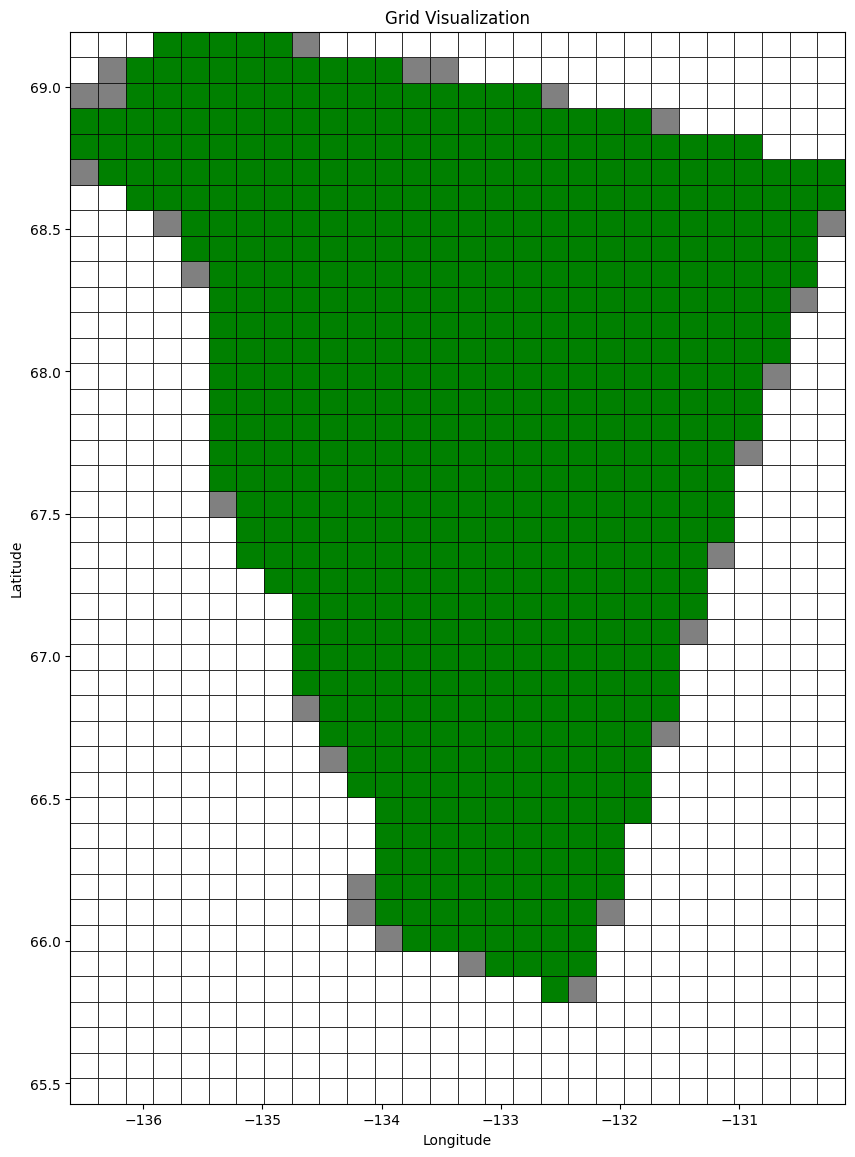

Using dynamic range: min_val=-0.0200, max_val=0.0200
Valid histograms: 588


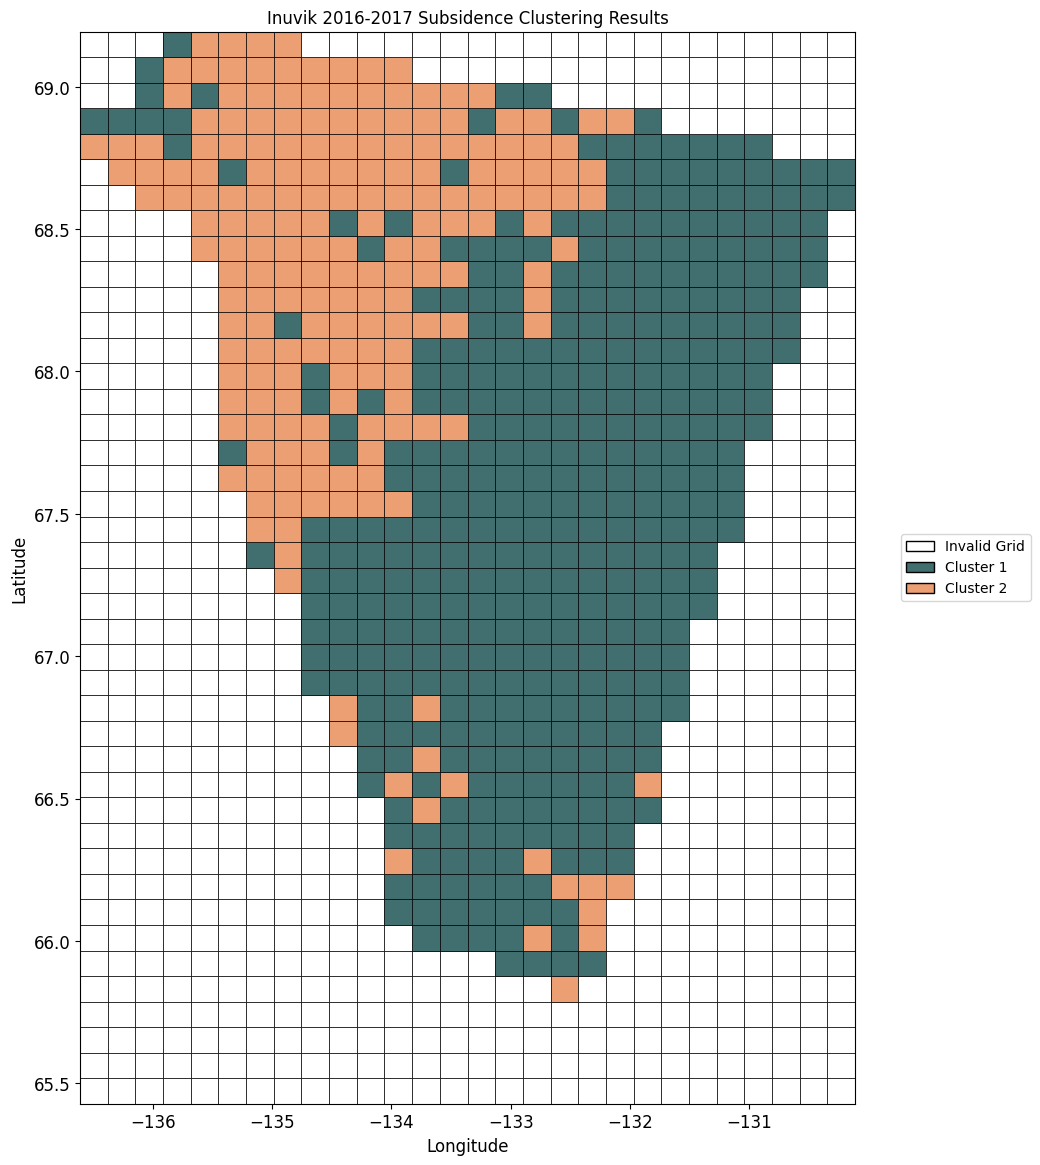

✅ Cluster NetCDF file saved as: Inuvik_2016_2017_clusters.nc


In [33]:
subsidence_1617, lons, lats, zip_masked_1617 = prepare_subsidence_data('invk', '201617', 'orgsub', min_value=-0.02, max_value=0.02)
invk_grid = create_km_grid(lons, lats, resolution_km=10)

# Count the number of points in each grid cell
data_counts_1617 = []
for cell in invk_grid:
    lon_start, lon_end, lat_start, lat_end = cell
    mask = (zip_masked_1617[:, 0] >= lon_start) & (zip_masked_1617[:, 0] < lon_end) & (zip_masked_1617[:, 1] >= lat_start) & (zip_masked_1617[:, 1] < lat_end)
    data_counts_1617.append(np.sum(mask))

# Visualise the grid results
visualise_grid_results(invk_grid, data_counts_1617)


#hist_invk_1617,_,_ = bin_valid_data(invk_grid, zip_masked_1617, bins=50, min_val=None, max_val=None,threshold=6000)
hist_invk_1617,_,_,stats_1617 = bin_valid_data_with_stats(invk_grid, zip_masked_1617, bins=50, min_val=None, max_val=None,threshold=6000)

std_1617 = stats_1617[:, 1]

# Ensure valid grids are filtered correctly
data_counts_1617 = np.array(data_counts_1617)
valid_grids_mask = (data_counts_1617 >= 6000)
valid_histograms_1617 = hist_invk_1617[valid_grids_mask]
invk_grids_mask = valid_grids_mask.reshape(42,28)  


if valid_histograms_1617.size == 0:
    print("No valid histograms found. Ensure input data has sufficient values.")
else:
    print(f"Valid histograms: {valid_histograms_1617.shape[0]}")

    # Step 2: Hybrid Clustering
    k_clusters = 2
    hybrid_means = HybridClustering(n_clusters=k_clusters)
    valid_histograms_1617 = valid_histograms_1617[~np.isnan(valid_histograms_1617).any(axis=1)]
    hybrid_means.fit(valid_histograms_1617)

    # Map cluster assignments back to the original grid
    cluster_assignments = np.full(len(invk_grid), -1)  # Initialize all grids as "No Data" (-1)
    cluster_assignments[valid_grids_mask] = hybrid_means.assignments  # Assign clusters only to valid grids

    
    # Define special values for each cluster
    cluster_values = {0: 111, 1: 222, 2: 333}
    updated_data_counts = np.array(data_counts_1617)  # Start with original data counts

    # Update the data_counts array with cluster values for valid grids
    for grid_index, cluster in enumerate(cluster_assignments):
        if cluster in cluster_values:  # Only valid clusters get updated
            updated_data_counts[grid_index] = cluster_values[cluster]

    # Visualize the updated grid
    visualise_updated_grid(invk_grids_mask, invk_grid, updated_data_counts, title="Inuvik 2016-2017 Subsidence Clustering Results")




# Grid shape (as already defined)
nrows, ncols = invk_grids_mask.shape  # e.g., 27, 20

# Reshape flat cluster assignment array into 2D raster
cluster_raster = np.full(nrows * ncols, np.nan)
cluster_raster[valid_grids_mask] = hybrid_means.assignments
cluster_raster = cluster_raster.reshape(nrows, ncols)

# Assign meaningful values (optional but helpful for visualization)
cluster_raster_int = np.full_like(cluster_raster, fill_value=-1, dtype=int)
cluster_raster_int[cluster_raster == 0] = 111
cluster_raster_int[cluster_raster == 1] = 222
# If you had 3 clusters:
# cluster_raster_int[cluster_raster == 2] = 333

# Generate lat/lon centers from your grid
lat_centers = np.array([(cell[2] + cell[3]) / 2 for cell in invk_grid]).reshape(nrows, ncols)[:, 0]
lon_centers = np.array([(cell[0] + cell[1]) / 2 for cell in invk_grid]).reshape(nrows, ncols)[0, :]

# Write NetCDF
output_file = "Inuvik_2016_2017_clusters.nc"
with nc.Dataset(output_file, 'w', format='NETCDF4') as ds:
    # Dimensions
    ds.createDimension('lat', nrows)
    ds.createDimension('lon', ncols)

    # Variables
    lat_var = ds.createVariable('lat', 'f4', ('lat',))
    lon_var = ds.createVariable('lon', 'f4', ('lon',))
    cluster_var = ds.createVariable('cluster_id', 'i4', ('lat', 'lon'), fill_value=-1)

    # Assign values
    lat_var[:] = lat_centers
    lon_var[:] = lon_centers
    cluster_var[:, :] = cluster_raster_int

    # Add metadata (optional)
    cluster_var.units = "categorical"
    cluster_var.description = "Cluster assignment: 111 = Cluster 1, 222 = Cluster 2, -1 = No Data"
    ds.title = "Inuvik 2016–2017 Cluster Assignment Raster"
    ds.source = "Hybrid clustering on subsidence histograms"

print(f"✅ Cluster NetCDF file saved as: {output_file}")


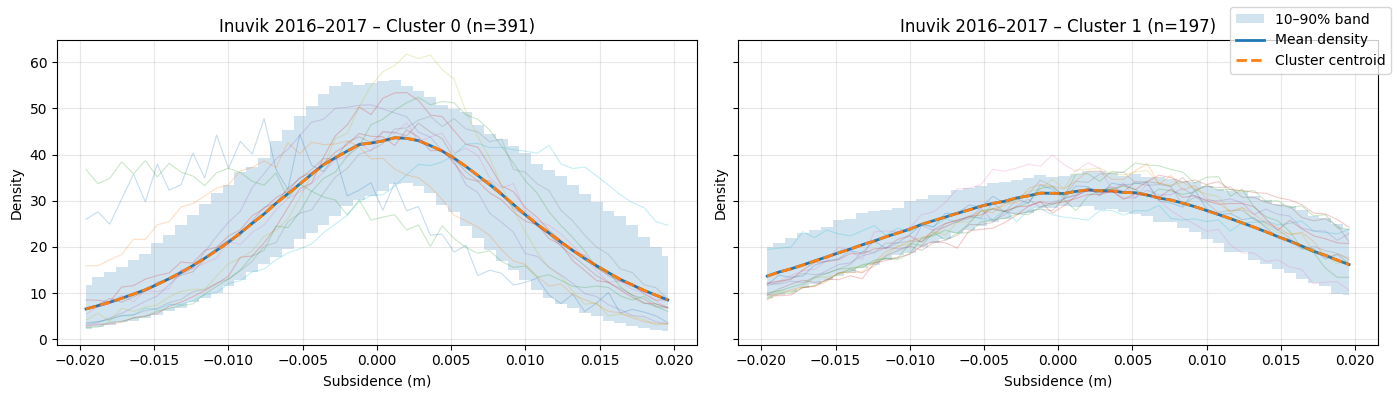

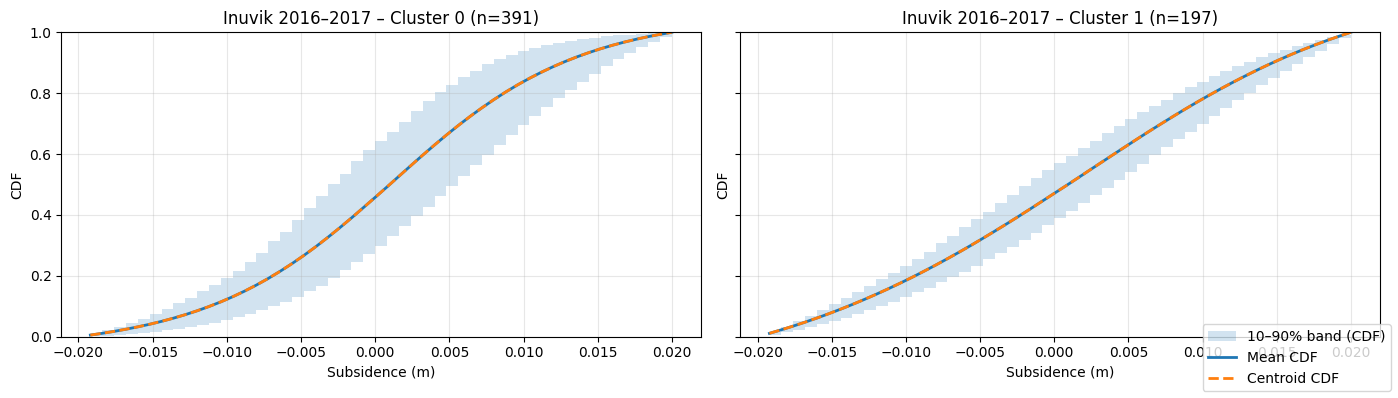

In [34]:
hybrid_means = HybridClustering(n_clusters=k_clusters)
valid_histograms_1617 = valid_histograms_1617[~np.isnan(valid_histograms_1617).any(axis=1)]
hybrid_means.fit(valid_histograms_1617)


# Reconstruct the global bin edges used for the histograms
bins = valid_histograms_1617.shape[1]
global_min = float(zip_masked_1617[:, 2].min())
global_max = float(zip_masked_1617[:, 2].max())
bin_edges = np.linspace(global_min, global_max, bins + 1)

# Quick visual: histograms per cluster (densities)
plot_cluster_histograms(
    H=valid_histograms_1617,
    labels=hybrid_means.assignments,
    bin_edges=bin_edges,
    centroids=hybrid_means.centroids,  # optional overlay
    n_examples=12,
    example_alpha=0.25,
    title_prefix="Inuvik 2016–2017 – "
)

# Optional: CDF view (often makes shifts easier to spot)
plot_cluster_cdfs(
    H=valid_histograms_1617,
    labels=hybrid_means.assignments,
    bin_edges=bin_edges,
    centroids=hybrid_means.centroids,
    title_prefix="Inuvik 2016–2017 – "
)


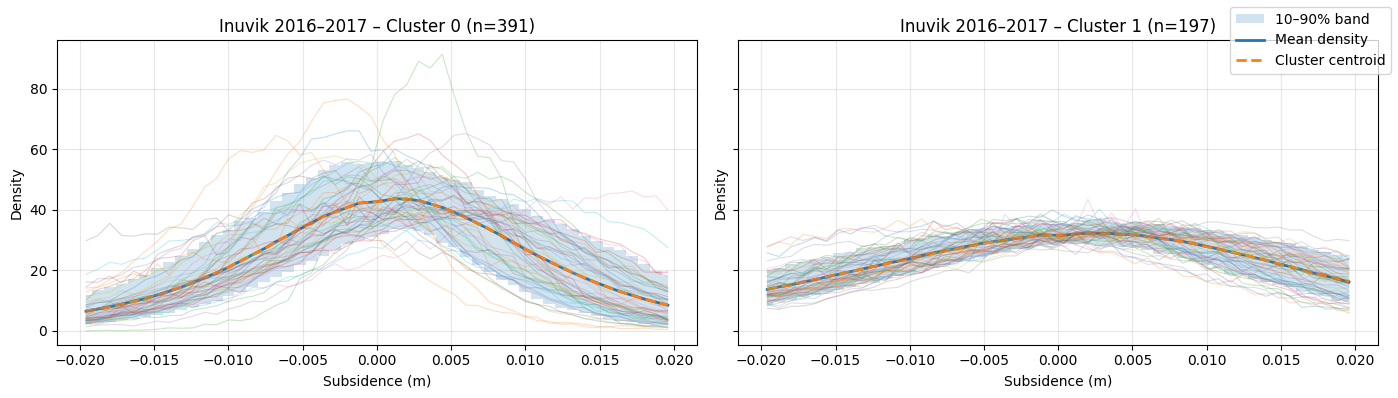

Inuvik 2016–2017 – Hybrid – Cluster 0 (n=391)
  mean (m):     [-0.0063, 0.0069]
  std  (m):     [0.0047, 0.0111]
  skew (unit):  [-0.692, 0.556]
  kurt (unit):  [2.096, 3.904]  (Pearson)

Inuvik 2016–2017 – Hybrid – Cluster 1 (n=197)
  mean (m):     [-0.0040, 0.0040]
  std  (m):     [0.0095, 0.0112]
  skew (unit):  [-0.408, 0.399]
  kurt (unit):  [1.871, 2.254]  (Pearson)



In [57]:
plot_cluster_histograms(
    H=valid_histograms_1617,
    labels=hybrid_means.assignments,
    bin_edges=bin_edges,
    centroids=hybrid_means.centroids,  # optional overlay
    n_examples=50,
    example_alpha=0.25,
    title_prefix="Inuvik 2016–2017 – "
)

summarize_cluster_moments(
    H=valid_histograms_1617,                 # densities from your binning
    labels=hybrid_means.assignments,         # hybrid cluster labels
    bin_edges=bin_edges,                      # global edges you reconstructed
    from_density=True,                        # H are densities
    title_prefix="Inuvik 2016–2017 – Hybrid – "
)


Total grids: 1176
Green grids (>= 6000 points): 589
longitude: -136.61243603636208 -130.11162661570145
latitude: 65.42808051672024 69.19402167263743


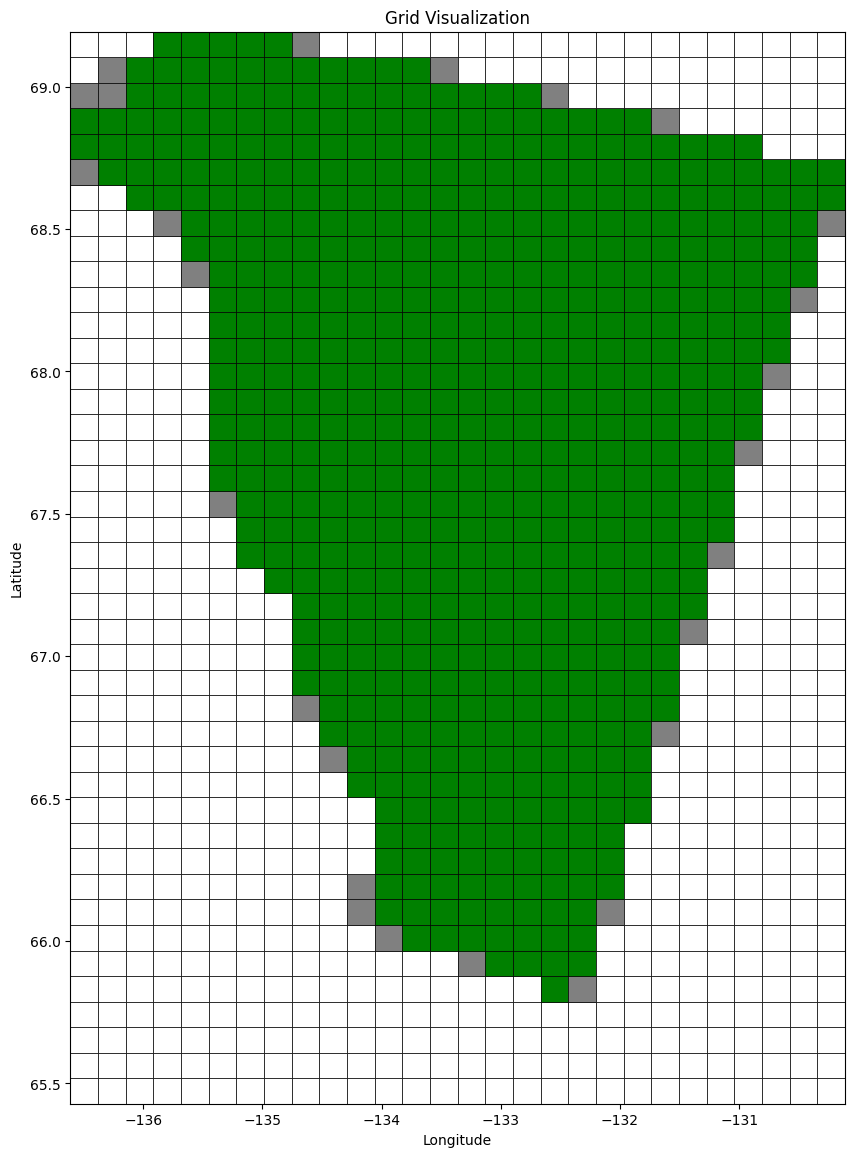

Using dynamic range: min_val=-0.0200, max_val=0.0200
Valid histograms: 589


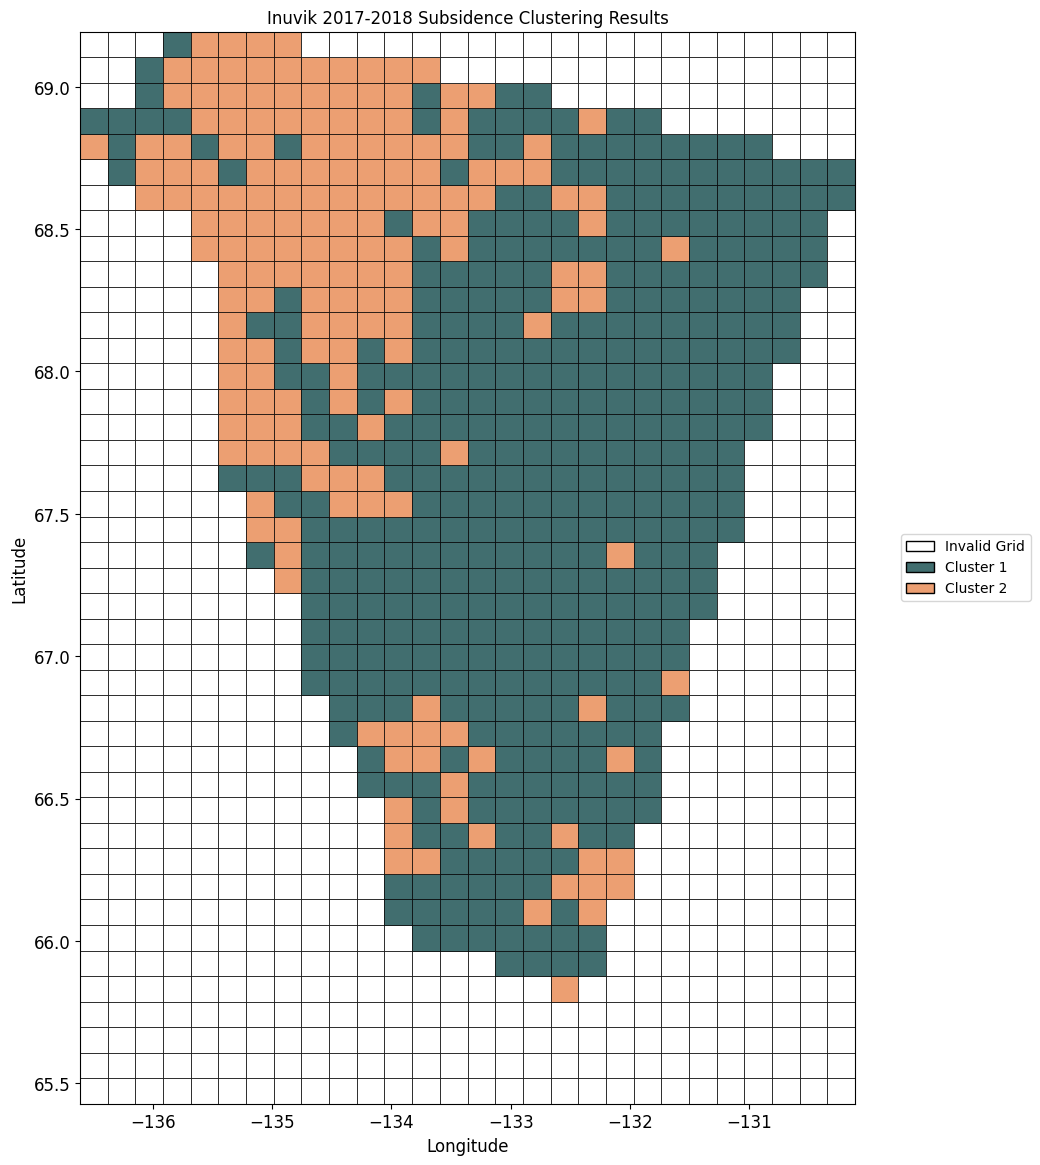

✅ Cluster NetCDF file saved as: Inuvik_2017_2018_clusters.nc


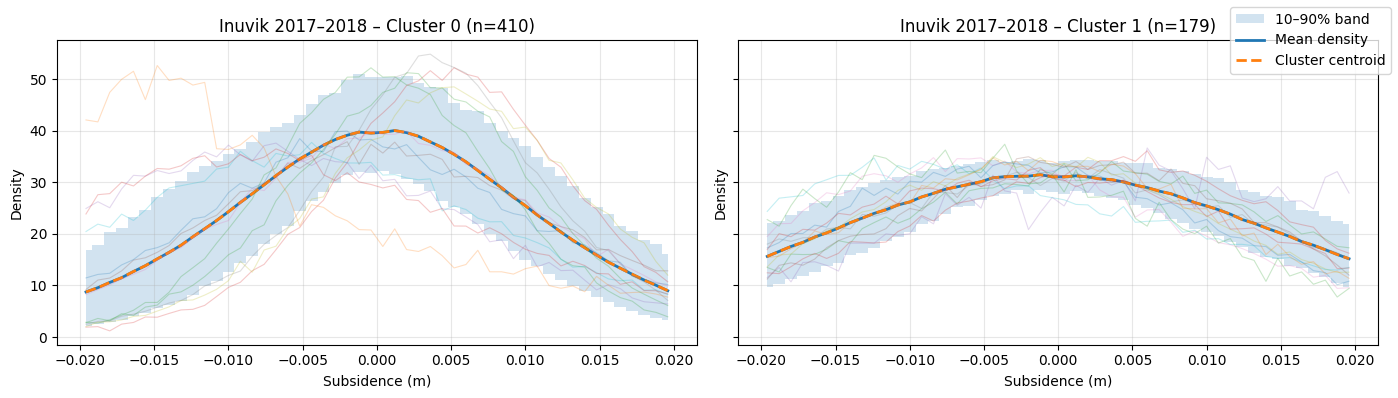

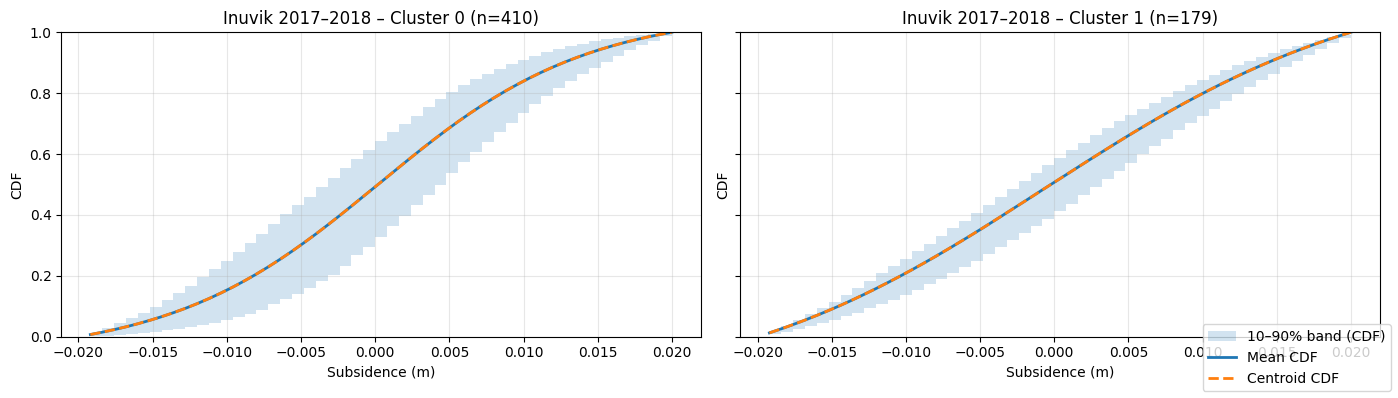

In [60]:
subsidence_1718, lons, lats, zip_masked_1718 = prepare_subsidence_data('invk', '201718', 'orgsub', min_value=-0.02, max_value=0.02)
invk_grid = create_km_grid(lons, lats, resolution_km=10)

# Count the number of points in each grid cell
data_counts_1718 = []
for cell in invk_grid:
    lon_start, lon_end, lat_start, lat_end = cell
    mask = (zip_masked_1718[:, 0] >= lon_start) & (zip_masked_1718[:, 0] < lon_end) & (zip_masked_1718[:, 1] >= lat_start) & (zip_masked_1718[:, 1] < lat_end)
    data_counts_1718.append(np.sum(mask))

# Visualise the grid results
visualise_grid_results(invk_grid, data_counts_1718)


#hist_invk_1617,_,_ = bin_valid_data(invk_grid, zip_masked_1617, bins=50, min_val=None, max_val=None,threshold=6000)
hist_invk_1718,_,_,stats_1718 = bin_valid_data_with_stats(invk_grid, zip_masked_1718, bins=50, min_val=None, max_val=None,threshold=6000)

std_1718 = stats_1718[:, 1]

# Ensure valid grids are filtered correctly
data_counts_1718 = np.array(data_counts_1718)
valid_grids_mask = (data_counts_1718 >= 6000)
valid_histograms_1718 = hist_invk_1718[valid_grids_mask]
invk_grids_mask = valid_grids_mask.reshape(42,28)  


if valid_histograms_1718.size == 0:
    print("No valid histograms found. Ensure input data has sufficient values.")
else:
    print(f"Valid histograms: {valid_histograms_1718.shape[0]}")

    # Step 2: EP-MEANS Clustering
    k_clusters = 2
    hybrid_means = HybridClustering(n_clusters=k_clusters)
    valid_histograms_1718 = valid_histograms_1718[~np.isnan(valid_histograms_1718).any(axis=1)]
    hybrid_means.fit(valid_histograms_1718)

    # Map cluster assignments back to the original grid
    cluster_assignments = np.full(len(invk_grid), -1)  # Initialize all grids as "No Data" (-1)
    cluster_assignments[valid_grids_mask] = hybrid_means.assignments  # Assign clusters only to valid grids

    
    # Define special values for each cluster
    cluster_values = {0: 111, 1: 222, 2: 333}
    updated_data_counts = np.array(data_counts_1718)  # Start with original data counts

    # Update the data_counts array with cluster values for valid grids
    for grid_index, cluster in enumerate(cluster_assignments):
        if cluster in cluster_values:  # Only valid clusters get updated
            updated_data_counts[grid_index] = cluster_values[cluster]

    # Visualize the updated grid
    visualise_updated_grid(invk_grids_mask, invk_grid, updated_data_counts, title="Inuvik 2017-2018 Subsidence Clustering Results")




# Grid shape (as already defined)
nrows, ncols = invk_grids_mask.shape  # e.g., 27, 20

# Reshape flat cluster assignment array into 2D raster
cluster_raster = np.full(nrows * ncols, np.nan)
cluster_raster[valid_grids_mask] = hybrid_means.assignments
cluster_raster = cluster_raster.reshape(nrows, ncols)

# Assign meaningful values (optional but helpful for visualization)
cluster_raster_int = np.full_like(cluster_raster, fill_value=-1, dtype=int)
cluster_raster_int[cluster_raster == 0] = 111
cluster_raster_int[cluster_raster == 1] = 222
# If you had 3 clusters:
# cluster_raster_int[cluster_raster == 2] = 333

# Generate lat/lon centers from your grid
lat_centers = np.array([(cell[2] + cell[3]) / 2 for cell in invk_grid]).reshape(nrows, ncols)[:, 0]
lon_centers = np.array([(cell[0] + cell[1]) / 2 for cell in invk_grid]).reshape(nrows, ncols)[0, :]

# Write NetCDF
output_file = "Inuvik_2017_2018_clusters.nc"
with nc.Dataset(output_file, 'w', format='NETCDF4') as ds:
    # Dimensions
    ds.createDimension('lat', nrows)
    ds.createDimension('lon', ncols)

    # Variables
    lat_var = ds.createVariable('lat', 'f4', ('lat',))
    lon_var = ds.createVariable('lon', 'f4', ('lon',))
    cluster_var = ds.createVariable('cluster_id', 'i4', ('lat', 'lon'), fill_value=-1)

    # Assign values
    lat_var[:] = lat_centers
    lon_var[:] = lon_centers
    cluster_var[:, :] = cluster_raster_int

    # Add metadata (optional)
    cluster_var.units = "categorical"
    cluster_var.description = "Cluster assignment: 111 = Cluster 1, 222 = Cluster 2, -1 = No Data"
    ds.title = "Inuvik 2017–2018 Cluster Assignment Raster"
    ds.source = "Hybrid clustering on subsidence histograms"

print(f"✅ Cluster NetCDF file saved as: {output_file}")

hybrid_means = HybridClustering(n_clusters=k_clusters)
valid_histograms_1718 = valid_histograms_1718[~np.isnan(valid_histograms_1718).any(axis=1)]
hybrid_means.fit(valid_histograms_1718)


# Reconstruct the global bin edges used for the histograms
bins = valid_histograms_1718.shape[1]
global_min = float(zip_masked_1617[:, 2].min())
global_max = float(zip_masked_1617[:, 2].max())
bin_edges = np.linspace(global_min, global_max, bins + 1)

# Quick visual: histograms per cluster (densities)
plot_cluster_histograms(
    H=valid_histograms_1718,
    labels=hybrid_means.assignments,
    bin_edges=bin_edges,
    centroids=hybrid_means.centroids,  # optional overlay
    n_examples=12,
    example_alpha=0.25,
    title_prefix="Inuvik 2017–2018 – "
)

# Optional: CDF view (often makes shifts easier to spot)
plot_cluster_cdfs(
    H=valid_histograms_1718,
    labels=hybrid_means.assignments,
    bin_edges=bin_edges,
    centroids=hybrid_means.centroids,
    title_prefix="Inuvik 2017–2018 – "
)


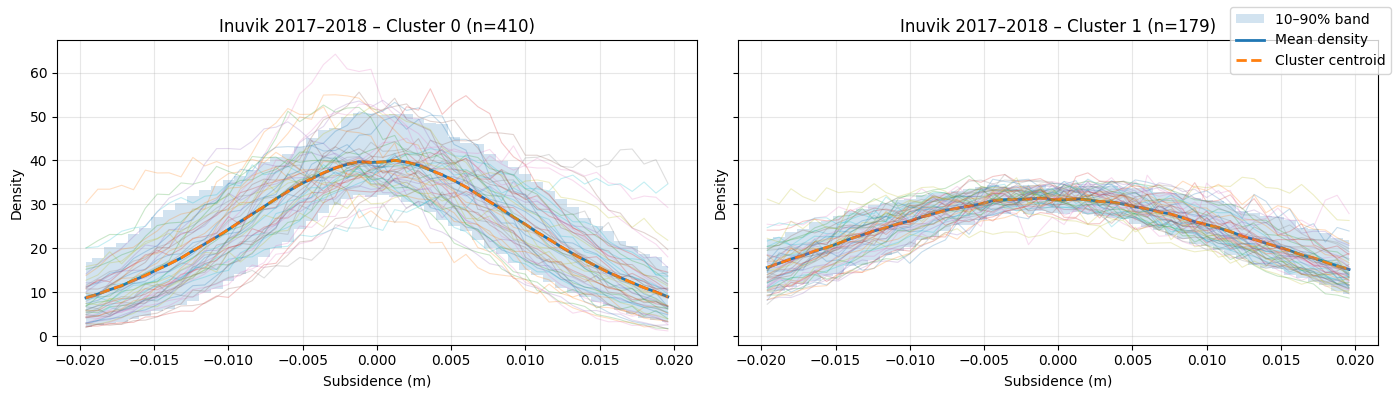

Inuvik 2017–2018 – Hybrid – Cluster 0 (n=410)
  mean (m):     [-0.0076, 0.0095]
  std  (m):     [0.0049, 0.0105]
  skew (unit):  [-1.121, 0.786]
  kurt (unit):  [2.138, 3.970]  (Pearson)

Inuvik 2017–2018 – Hybrid – Cluster 1 (n=179)
  mean (m):     [-0.0033, 0.0033]
  std  (m):     [0.0098, 0.0109]
  skew (unit):  [-0.337, 0.334]
  kurt (unit):  [1.908, 2.184]  (Pearson)



In [61]:
# Quick visual: histograms per cluster (densities)
plot_cluster_histograms(
    H=valid_histograms_1718,
    labels=hybrid_means.assignments,
    bin_edges=bin_edges,
    centroids=hybrid_means.centroids,  # optional overlay   
    n_examples=50,
    example_alpha=0.25,
    title_prefix="Inuvik 2017–2018 – "
)

summarize_cluster_moments(
    H=valid_histograms_1718,                 # densities from your binning
    labels=hybrid_means.assignments,         # hybrid cluster labels
    bin_edges=bin_edges,                      # global edges you reconstructed
    from_density=True,                        # H are densities
    title_prefix="Inuvik 2017–2018 – Hybrid – "
)


Total grids: 1176
Green grids (>= 6000 points): 589
longitude: -136.61243603636208 -130.11162661570145
latitude: 65.42808051672024 69.19402167263743


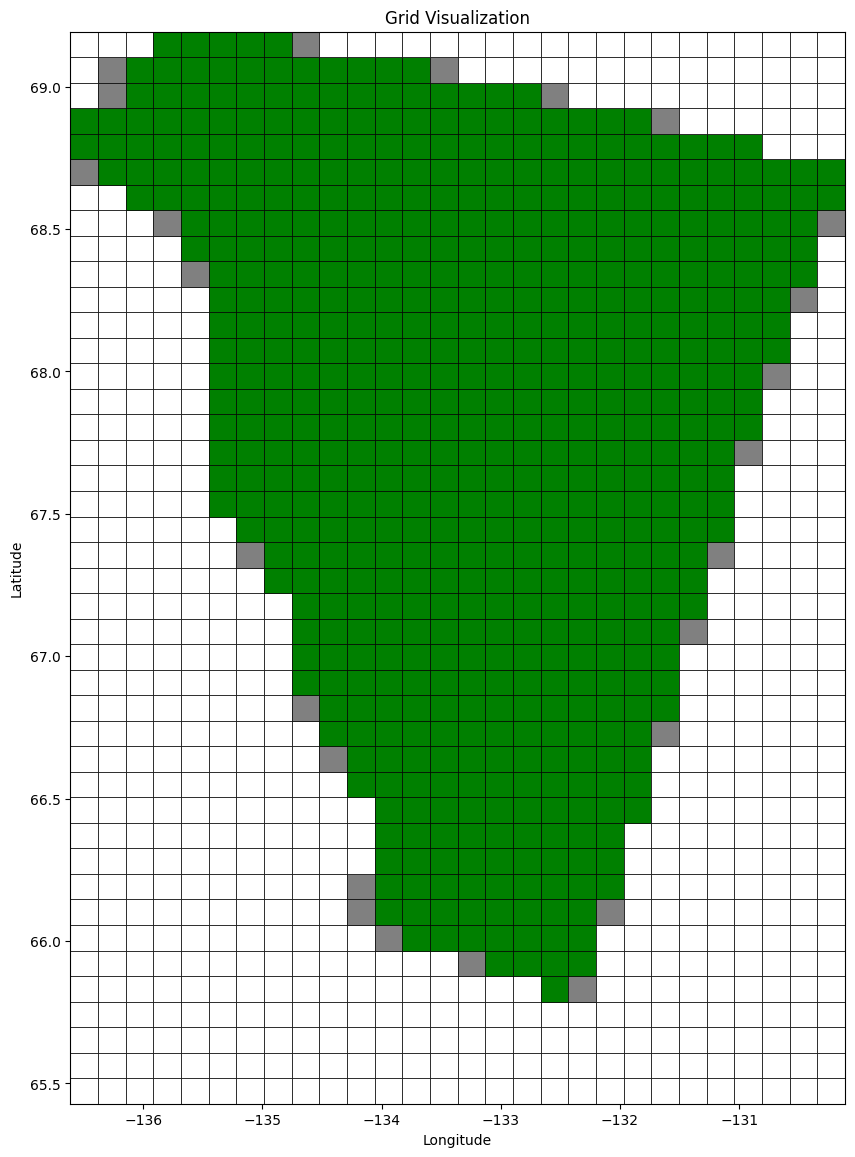

Using dynamic range: min_val=-0.0200, max_val=0.0200
Valid histograms: 589


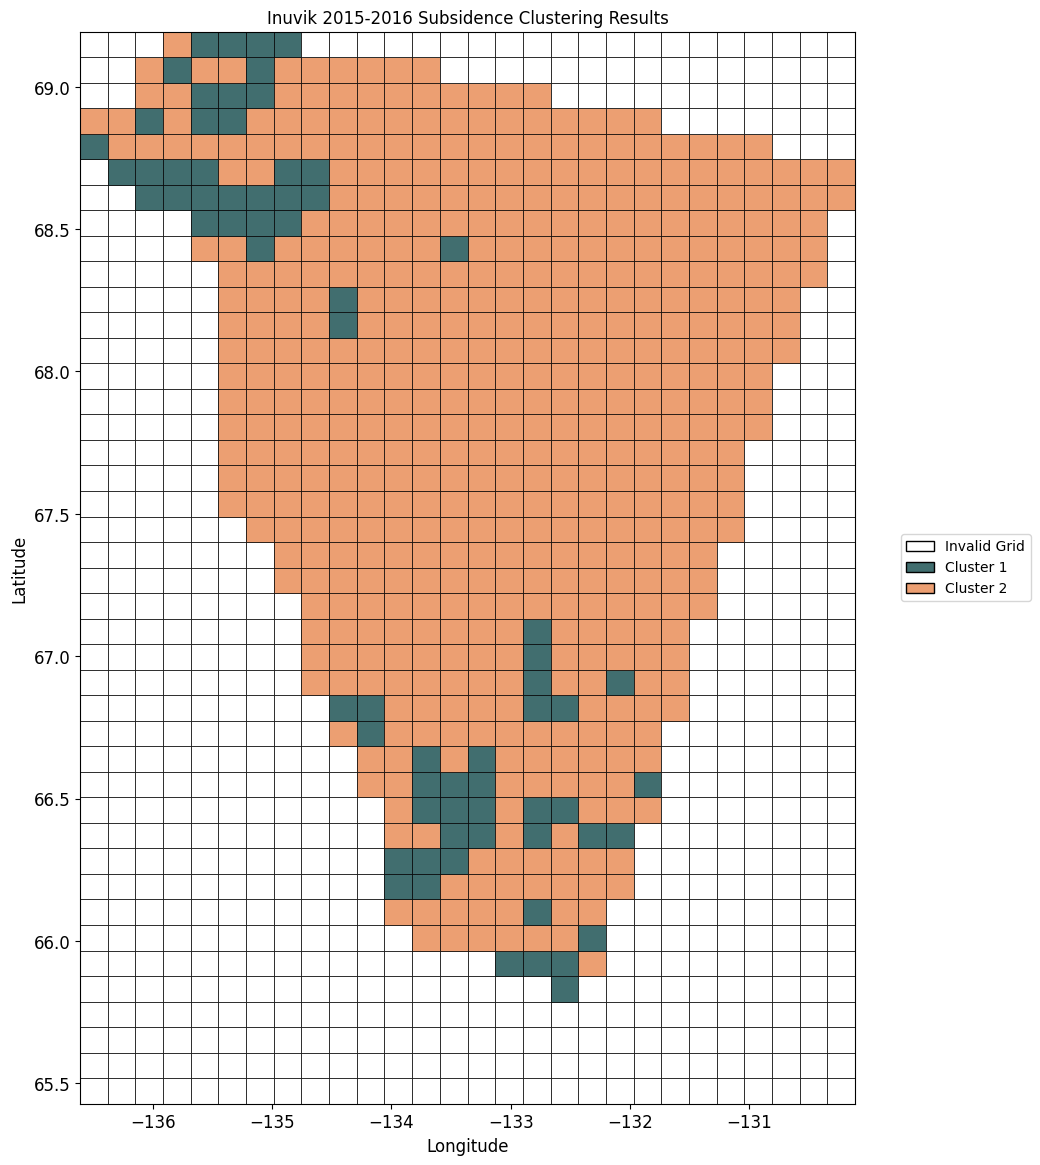

✅ Cluster NetCDF file saved as: Inuvik_2015_2016_clusters.nc


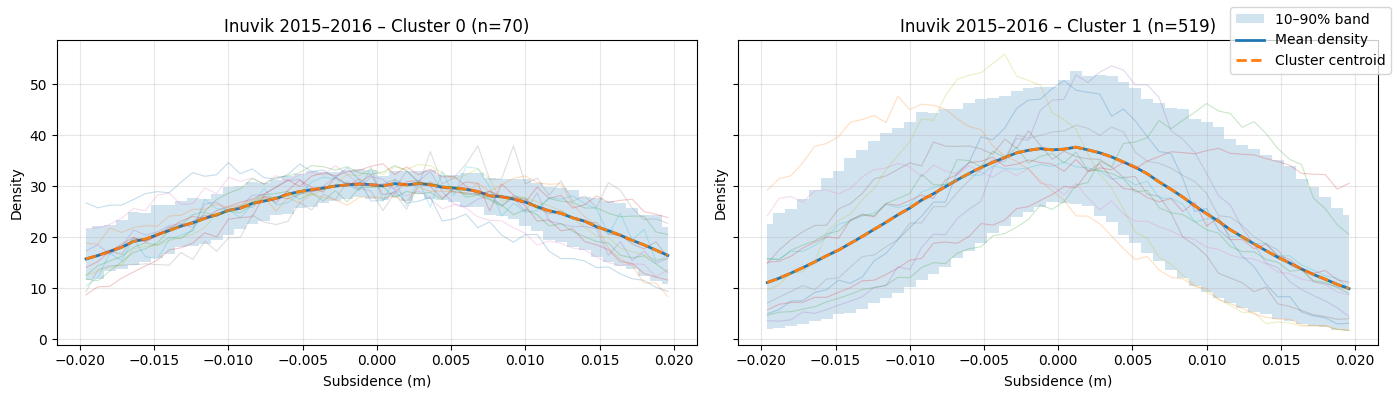

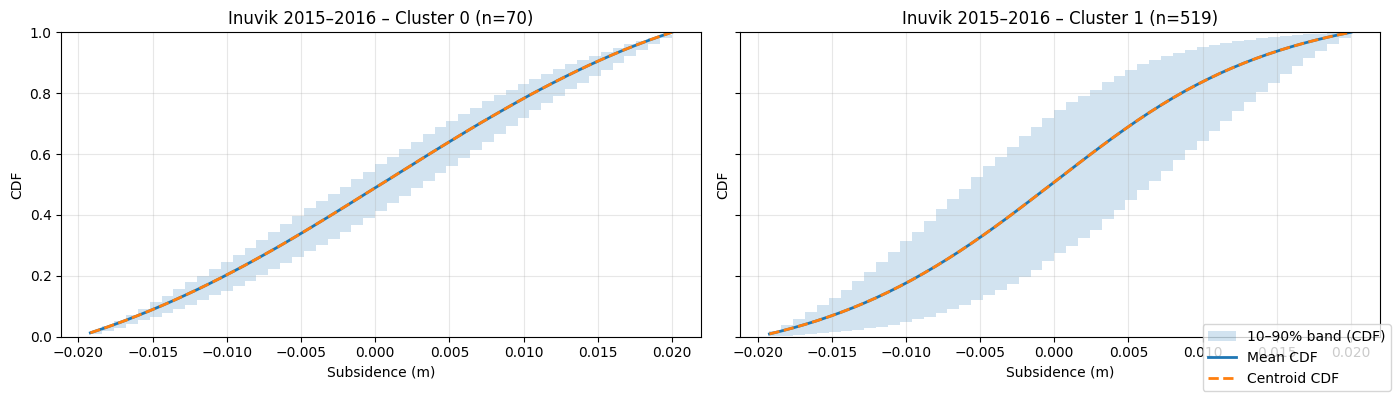

In [ ]:
subsidence_1516, lons, lats, zip_masked_1516 = prepare_subsidence_data('invk', '201516', 'orgsub', min_value=-0.02, max_value=0.02)
invk_grid = create_km_grid(lons, lats, resolution_km=10)

# Count the number of points in each grid cell
data_counts_1516 = []
for cell in invk_grid:
    lon_start, lon_end, lat_start, lat_end = cell
    mask = (zip_masked_1516[:, 0] >= lon_start) & (zip_masked_1516[:, 0] < lon_end) & (zip_masked_1516[:, 1] >= lat_start) & (zip_masked_1516[:, 1] < lat_end)
    data_counts_1516.append(np.sum(mask))

# Visualise the grid results
visualise_grid_results(invk_grid, data_counts_1516)


#hist_invk_1617,_,_ = bin_valid_data(invk_grid, zip_masked_1617, bins=50, min_val=None, max_val=None,threshold=6000)
hist_invk_1516,_,_,stats_1516 = bin_valid_data_with_stats(invk_grid, zip_masked_1516, bins=50, min_val=None, max_val=None,threshold=6000)

std_1516 = stats_1516[:, 1]

# Ensure valid grids are filtered correctly
data_counts_1516 = np.array(data_counts_1516)
valid_grids_mask = (data_counts_1516 >= 6000)
valid_histograms_1516 = hist_invk_1516[valid_grids_mask]
invk_grids_mask = valid_grids_mask.reshape(42,28)  


if valid_histograms_1516.size == 0:
    print("No valid histograms found. Ensure input data has sufficient values.")
else:
    print(f"Valid histograms: {valid_histograms_1516.shape[0]}")

    # Step 2: Hybrid Clustering
    k_clusters = 2
    hybrid_means = HybridClustering(n_clusters=k_clusters)
    valid_histograms_1516 = valid_histograms_1516[~np.isnan(valid_histograms_1516).any(axis=1)]
    hybrid_means.fit(valid_histograms_1516)

    # Map cluster assignments back to the original grid
    cluster_assignments = np.full(len(invk_grid), -1)  # Initialize all grids as "No Data" (-1)
    cluster_assignments[valid_grids_mask] = hybrid_means.assignments  # Assign clusters only to valid grids

    
    # Define special values for each cluster
    cluster_values = {0: 111, 1: 222, 2: 333}
    updated_data_counts = np.array(data_counts_1516)  # Start with original data counts

    # Update the data_counts array with cluster values for valid grids
    for grid_index, cluster in enumerate(cluster_assignments):
        if cluster in cluster_values:  # Only valid clusters get updated
            updated_data_counts[grid_index] = cluster_values[cluster]

    # Visualize the updated grid
    visualise_updated_grid(invk_grids_mask, invk_grid, updated_data_counts, title="Inuvik 2015-2016 Subsidence Clustering Results")




# Grid shape (as already defined)
nrows, ncols = invk_grids_mask.shape  # e.g., 27, 20

# Reshape flat cluster assignment array into 2D raster
cluster_raster = np.full(nrows * ncols, np.nan)
cluster_raster[valid_grids_mask] = hybrid_means.assignments
cluster_raster = cluster_raster.reshape(nrows, ncols)

# Assign meaningful values (optional but helpful for visualization)
cluster_raster_int = np.full_like(cluster_raster, fill_value=-1, dtype=int)
cluster_raster_int[cluster_raster == 0] = 111
cluster_raster_int[cluster_raster == 1] = 222
# If you had 3 clusters:
# cluster_raster_int[cluster_raster == 2] = 333

# Generate lat/lon centers from your grid
lat_centers = np.array([(cell[2] + cell[3]) / 2 for cell in invk_grid]).reshape(nrows, ncols)[:, 0]
lon_centers = np.array([(cell[0] + cell[1]) / 2 for cell in invk_grid]).reshape(nrows, ncols)[0, :]

# Write NetCDF
output_file = "Inuvik_2015_2016_clusters.nc"
with nc.Dataset(output_file, 'w', format='NETCDF4') as ds:
    # Dimensions
    ds.createDimension('lat', nrows)
    ds.createDimension('lon', ncols)

    # Variables
    lat_var = ds.createVariable('lat', 'f4', ('lat',))
    lon_var = ds.createVariable('lon', 'f4', ('lon',))
    cluster_var = ds.createVariable('cluster_id', 'i4', ('lat', 'lon'), fill_value=-1)

    # Assign values
    lat_var[:] = lat_centers
    lon_var[:] = lon_centers
    cluster_var[:, :] = cluster_raster_int

    # Add metadata (optional)
    cluster_var.units = "categorical"
    cluster_var.description = "Cluster assignment: 111 = Cluster 1, 222 = Cluster 2, -1 = No Data"
    ds.title = "Inuvik 2015–2016 Cluster Assignment Raster"
    ds.source = "Hybrid clustering on subsidence histograms"

print(f"✅ Cluster NetCDF file saved as: {output_file}")

hybrid_means = HybridClustering(n_clusters=k_clusters)
valid_histograms_1516 = valid_histograms_1516[~np.isnan(valid_histograms_1516).any(axis=1)]
hybrid_means.fit(valid_histograms_1516)


# Reconstruct the global bin edges used for the histograms
bins = valid_histograms_1516.shape[1]
global_min = float(zip_masked_1617[:, 2].min())
global_max = float(zip_masked_1617[:, 2].max())
bin_edges = np.linspace(global_min, global_max, bins + 1)

# Quick visual: histograms per cluster (densities)
plot_cluster_histograms(
    H=valid_histograms_1516,
    labels=hybrid_means.assignments,
    bin_edges=bin_edges,
    centroids=hybrid_means.centroids,  # optional overlay
    n_examples=12,
    example_alpha=0.25,
    title_prefix="Inuvik 2015–2016 – "
)

# Optional: CDF view (often makes shifts easier to spot)
plot_cluster_cdfs(
    H=valid_histograms_1516,
    labels=hybrid_means.assignments,
    bin_edges=bin_edges,
    centroids=hybrid_means.centroids,
    title_prefix="Inuvik 2015–2016 – "
)


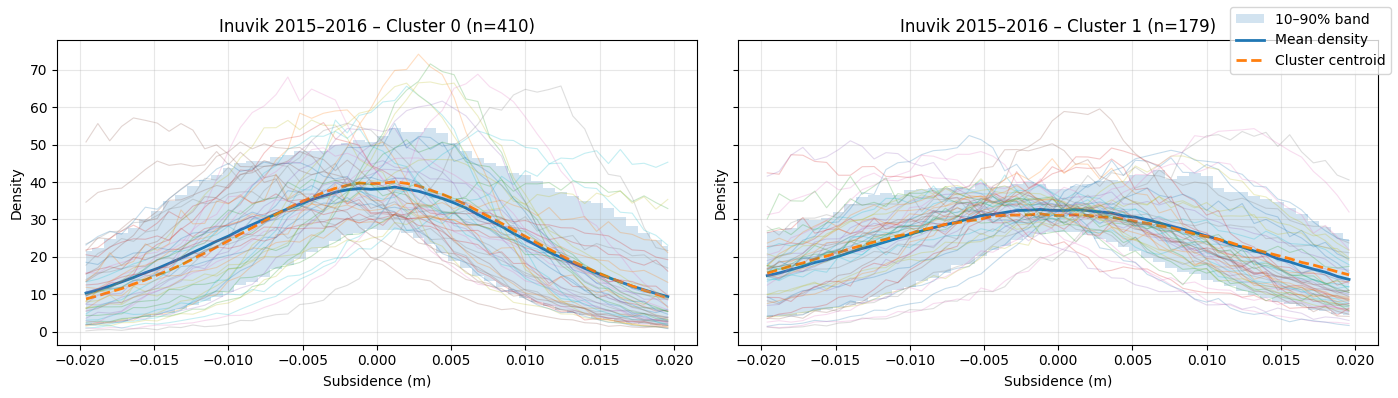

Inuvik 2015–2016 – Hybrid – Cluster 0 (n=410)
  mean (m):     [-0.0096, 0.0107]
  std  (m):     [0.0049, 0.0110]
  skew (unit):  [-1.116, 1.059]
  kurt (unit):  [1.892, 4.285]  (Pearson)

Inuvik 2015–2016 – Hybrid – Cluster 1 (n=179)
  mean (m):     [-0.0076, 0.0107]
  std  (m):     [0.0070, 0.0112]
  skew (unit):  [-1.037, 0.847]
  kurt (unit):  [1.918, 3.817]  (Pearson)



In [63]:
# Quick visual: histograms per cluster (densities)
plot_cluster_histograms(
    H=valid_histograms_1516,
    labels=hybrid_means.assignments,
    bin_edges=bin_edges,
    centroids=hybrid_means.centroids,  # optional overlay
    n_examples=50,
    example_alpha=0.25,
    title_prefix="Inuvik 2015–2016 – "
)

summarize_cluster_moments(
    H=valid_histograms_1516,                 # densities from your binning
    labels=hybrid_means.assignments,         # hybrid cluster labels
    bin_edges=bin_edges,                      # global edges you reconstructed
    from_density=True,                        # H are densities
    title_prefix="Inuvik 2015–2016 – Hybrid – "
)


In [67]:
# ==============================
#   A. RAW→QUANTILES UTILITIES
# ==============================

def collect_cell_samples(grid, data, threshold=6000):
    """
    From raw (lon, lat, value) points, collect per-cell sample arrays.
    Returns:
        samples_list: list of 1D numpy arrays (only for valid cells)
        valid_mask:   boolean array len(grid), True where count >= threshold
        counts:       np.array of counts per cell (same length as grid)
    """
    samples_list = []
    counts = np.zeros(len(grid), dtype=int)
    valid_mask = np.zeros(len(grid), dtype=bool)

    for i, (lon_start, lon_end, lat_start, lat_end) in enumerate(grid):
        mask = (
            (data[:, 0] >= lon_start) & (data[:, 0] < lon_end) &
            (data[:, 1] >= lat_start) & (data[:, 1] < lat_end)
        )
        subset = data[mask][:, 2]
        counts[i] = subset.size
        if subset.size >= threshold:
            valid_mask[i] = True
            samples_list.append(subset.astype(float))

    return samples_list, valid_mask, counts


def quantile_vector(samples, qs, clip=None):
    """
    Convert raw samples -> quantile vector on probability grid qs.
    clip=(lo,hi) optionally clips physical outliers before quantiles.
    """
    x = np.asarray(samples)
    x = x[np.isfinite(x)]
    if clip is not None:
        lo, hi = clip
        x = np.clip(x, lo, hi)
    # numpy >= 1.22: method="linear" default is fine
    return np.quantile(x, qs)


def quantiles_from_samples_list(samples_list, qs, clip=None):
    """
    Stack quantile vectors for all valid cells.
    Returns Q with shape (n_valid_cells, n_q).
    """
    Q = [quantile_vector(s, qs, clip=clip) for s in samples_list]
    return np.vstack(Q)

# ==============================
#   B. EP-MEANS (QUANTILE-BASED)
# ==============================

class EPMEANS:
    """
    EP-MEANS on raw 1-D distributions via quantile vectors.
    - Distance: W1 ≈ mean(|Q_a - Q_b|) on a fixed qs grid
    - Centroid: quantile-wise mean (Wasserstein-1 barycenter in 1-D)
    """
    def __init__(self, n_clusters, qs=None, max_iter=100, tol=1e-4, random_state=42, clip=None, reinit_empty=True):
        self.n_clusters = int(n_clusters)
        self.qs = np.linspace(0.0, 1.0, 257) if qs is None else np.asarray(qs)
        self.max_iter = int(max_iter)
        self.tol = float(tol)
        self.random_state = random_state
        self.clip = clip
        self.reinit_empty = reinit_empty

        self.centroids_ = None      # shape (k, n_q)
        self.labels_ = None         # shape (n,)
        self.inertia_ = None        # sum of W1 distances to assigned centroids

    # ---------- helpers ----------
    @staticmethod
    def _w1_matrix(Q, C):
        """
        Pairwise W1 between data Q (n, n_q) and centroids C (k, n_q).
        Returns (n, k): mean absolute difference along quantile axis.
        """
        # broadcasting: (n,1,n_q) - (1,k,n_q) -> (n,k,n_q) -> mean over axis=2
        return np.mean(np.abs(Q[:, None, :] - C[None, :, :]), axis=2)

    @staticmethod
    def _shift(C_old, C_new):
        """Max centroid shift under W1 (mean abs diff)."""
        return np.max(np.mean(np.abs(C_old - C_new), axis=1))

    def _init_kpp(self, Q, rng):
        """
        k-means++-like init under W1: pick first randomly,
        then sample next centroids with prob ∝ D^2 (D = W1 to nearest chosen).
        """
        n = Q.shape[0]
        centroids = np.empty((self.n_clusters, Q.shape[1]), dtype=float)

        # pick first at random
        first = rng.integers(n)
        centroids[0] = Q[first]

        # distances to nearest chosen centroid
        D = self._w1_matrix(Q, centroids[0:1])[:, 0]  # (n,)

        for j in range(1, self.n_clusters):
            # probabilities ∝ D^2 (avoid all-zero by epsilon)
            probs = D**2
            s = probs.sum()
            if s <= 0:
                idx = rng.integers(n)
            else:
                probs = probs / s
                idx = rng.choice(n, p=probs)
            centroids[j] = Q[idx]
            # update D to nearest of chosen
            D = np.minimum(D, self._w1_matrix(Q, centroids[j:j+1])[:, 0])
        return centroids

    # ---------- public API ----------
    def fit(self, data):
        """
        data can be:
          - list of 1D sample arrays (raw data per cell), OR
          - 2D quantile matrix Q with shape (n_cells, len(qs)).
        """
        rng = np.random.default_rng(self.random_state)

        # Convert to quantile matrix if needed
        if isinstance(data, (list, tuple)) or (isinstance(data, np.ndarray) and data.dtype == object):
            Q = quantiles_from_samples_list(data, self.qs, clip=self.clip)
        else:
            Q = np.asarray(data, dtype=float)
            if Q.ndim != 2 or Q.shape[1] != len(self.qs):
                raise ValueError("If passing a matrix, it must be of shape (n_cells, len(qs)).")

        # init
        C = self._init_kpp(Q, rng)

        for _ in range(self.max_iter):
            # assignment
            D = self._w1_matrix(Q, C)          # (n,k)
            labels = np.argmin(D, axis=1)

            # update (quantile-wise mean per cluster)
            C_new = np.empty_like(C)
            empty_clusters = []
            for k in range(self.n_clusters):
                members = Q[labels == k]
                if members.size == 0:
                    empty_clusters.append(k)
                    C_new[k] = C[k]  # placeholder; may re-init below
                else:
                    C_new[k] = members.mean(axis=0)

            # optional: re-seed empty clusters to farthest points
            if self.reinit_empty and empty_clusters:
                # find point with largest distance to its assigned centroid
                nearest = D[np.arange(Q.shape[0]), labels]
                for k in empty_clusters:
                    idx = np.argmax(nearest)
                    C_new[k] = Q[idx]
                    # make sure we don't pick the same idx again
                    nearest[idx] = -np.inf

            # check convergence under W1
            shift = self._shift(C, C_new)
            C = C_new
            if shift < self.tol:
                break

        # final assignment + inertia
        D = self._w1_matrix(Q, C)
        labels = np.argmin(D, axis=1)
        inertia = np.sum(D[np.arange(Q.shape[0]), labels])

        # store
        self.centroids_ = C
        self.labels_ = labels
        self.inertia_ = float(inertia)
        return self

    def predict(self, data):
        """
        Predict labels for new raw samples (list) or quantile matrix.
        """
        if self.centroids_ is None:
            raise RuntimeError("Call fit() first.")

        if isinstance(data, (list, tuple)) or (isinstance(data, np.ndarray) and data.dtype == object):
            Q = quantiles_from_samples_list(data, self.qs, clip=self.clip)
        else:
            Q = np.asarray(data, dtype=float)

        D = self._w1_matrix(Q, self.centroids_)
        return np.argmin(D, axis=1)
    

    # --- Compatibility helpers (put these once, near your plotting calls) ---
def _labels_from(ep):
    """Return cluster labels from either EPMEANS variant."""
    if hasattr(ep, "assignments"):
        return ep.assignments
    if hasattr(ep, "labels_"):
        return ep.labels_
    raise AttributeError("EPMEANS has neither .assignments nor .labels_")

def _centroids_from(ep):
    """Return centroids from either EPMEANS variant (or None)."""
    if hasattr(ep, "centroids"):
        return ep.centroids
    if hasattr(ep, "centroids_"):
        return ep.centroids_
    return None

def plot_cluster_distributions_from_samples(samples_list, labels, bins=50,
                                            rng=None, n_examples=20,
                                            centroid_qs=None, centroids=None):
    """
    Show, for each cluster:
      - mean density across member cells
      - 10–90% band across member densities
      - a few example cell densities (thin lines)
      - optional: centroid density (approximated from centroid quantiles)

    samples_list : list of 1D arrays (one per *valid* cell, same order used in EP-MEANS fit)
    labels       : (n_valid,) cluster labels from EP-MEANS (ep.labels_ or ep.assignments)
    bins         : number of histogram bins (shared across clusters)
    rng          : (min,max) range; if None, taken from all samples
    centroid_qs  : ep.qs (quantile grid), optional
    centroids    : ep.centroids_ (shape k×len(qs)), optional
    """
    # ----- set common binning
    if rng is None:
        all_vals = np.concatenate(samples_list)
        rng = (float(np.nanmin(all_vals)), float(np.nanmax(all_vals)))
    bin_edges = np.linspace(rng[0], rng[1], bins + 1)
    x_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])
    widths = np.diff(bin_edges)

    clusters = np.unique(labels)
    fig, axes = plt.subplots(1, len(clusters), figsize=(7 * len(clusters), 4), sharey=True)
    if len(clusters) == 1:
        axes = [axes]

    # helper: quantile-centroid -> density via inverse-CDF sampling
    def _centroid_density(qvec, qs, n_samp=40000):
        u = np.random.rand(n_samp)
        synth = np.interp(u, qs, qvec)               # inverse-CDF sampling
        h, _ = np.histogram(synth, bins=bin_edges, density=True)
        return h

    for ax, c in zip(axes, clusters):
        idx = np.where(labels == c)[0]
        if idx.size == 0:
            ax.set_title(f"Cluster {c} (n=0)")
            ax.axis("off")
            continue

        # build per-cell densities on the common bins
        Hc = []
        for i in idx:
            h, _ = np.histogram(samples_list[i], bins=bin_edges, density=True)
            Hc.append(h)
        Hc = np.vstack(Hc)

        # summary across cells
        mean_h = np.nanmean(Hc, axis=0)
        p10_h  = np.nanpercentile(Hc, 10, axis=0)
        p90_h  = np.nanpercentile(Hc, 90, axis=0)

        ax.fill_between(x_centers, p10_h, p90_h, step="mid", alpha=0.2, label="10–90% band")
        ax.plot(x_centers, mean_h, lw=2, label="Mean density")

        # a few member examples
        n_show = min(n_examples, Hc.shape[0])
        if n_show > 0:
            ex = np.random.choice(idx, size=n_show, replace=False)
            for i in ex:
                hi, _ = np.histogram(samples_list[i], bins=bin_edges, density=True)
                ax.plot(x_centers, hi, lw=0.8, alpha=0.25)

        # optional: centroid density
        if (centroids is not None) and (centroid_qs is not None):
            h0 = _centroid_density(centroids[c], centroid_qs)
            ax.plot(x_centers, h0, lw=2, ls="--", label="Centroid (approx. density)")

        ax.set_title(f"Cluster {c} (n={idx.size})")
        ax.set_xlabel("Subsidence (m)")
        ax.set_ylabel("Density")
        ax.grid(True, alpha=0.3)

    handles, labels_ = axes[-1].get_legend_handles_labels()
    if handles:
        fig.legend(handles, labels_, loc="upper right")
    fig.tight_layout()
    plt.show()


    
def plot_cluster_ecdfs_from_samples(samples_list, labels, rng=None, n_examples=30,
                                    centroid_qs=None, centroids=None):
    """
    Show per-cluster ECDFs:
      - 10–90% band of binned CDFs across member cells
      - mean CDF
      - a few example ECDF curves
      - optional: centroid CDF (exact, plotting (x=quantiles, y=qs))
    """
    # choose an x-grid to aggregate CDFs on (for the band/mean)
    if rng is None:
        all_vals = np.concatenate(samples_list)
        rng = (float(np.nanmin(all_vals)), float(np.nanmax(all_vals)))
    x_grid = np.linspace(rng[0], rng[1], 400)

    clusters = np.unique(labels)
    fig, axes = plt.subplots(1, len(clusters), figsize=(7 * len(clusters), 4), sharey=True)
    if len(clusters) == 1:
        axes = [axes]

    for ax, c in zip(axes, clusters):
        idx = np.where(labels == c)[0]
        if idx.size == 0:
            ax.set_title(f"Cluster {c} (n=0)")
            ax.axis("off")
            continue

        # aggregate ECDFs onto x_grid
        C = []
        for i in idx:
            x = np.sort(samples_list[i])
            y = np.arange(1, x.size + 1) / x.size
            # interpolate ECDF onto x_grid
            Ci = np.interp(x_grid, x, y, left=0.0, right=1.0)
            C.append(Ci)
        C = np.vstack(C)

        mean_c = np.nanmean(C, axis=0)
        p10_c  = np.nanpercentile(C, 10, axis=0)
        p90_c  = np.nanpercentile(C, 90, axis=0)

        ax.fill_between(x_grid, p10_c, p90_c, alpha=0.2, label="10–90% band (ECDF)")
        ax.plot(x_grid, mean_c, lw=2, label="Mean ECDF")

        # a few raw ECDFs for texture
        n_show = min(n_examples, idx.size)
        if n_show > 0:
            ex = np.random.choice(idx, size=n_show, replace=False)
            for i in ex:
                xx = np.sort(samples_list[i])
                yy = np.arange(1, xx.size + 1) / xx.size
                ax.plot(xx, yy, alpha=0.25, lw=0.8)

        # optional: centroid CDF (exact: x = quantiles, y = qs)
        if (centroids is not None) and (centroid_qs is not None):
            ax.plot(centroids[c], centroid_qs, lw=2, ls="--", label="Centroid CDF")

        ax.set_title(f"Cluster {c} (n={idx.size})")
        ax.set_xlabel("Subsidence (m)")
        ax.set_ylabel("CDF")
        ax.set_ylim(0, 1)
        ax.grid(True, alpha=0.3)

    handles, labels_ = axes[-1].get_legend_handles_labels()
    if handles:
        fig.legend(handles, labels_, loc="lower right")
    fig.tight_layout()
    plt.show()


def _labels_from(ep):
    return ep.labels_ if hasattr(ep, "labels_") else ep.assignments


def summarize_cluster_moments_from_samples(samples_list, labels, title_prefix="", clip=None):
    """
    Print min/max ranges of mean, std, skewness, kurtosis for each cluster,
    computed directly from raw per-cell samples (no binning).

    samples_list : list of 1D numpy arrays (valid cells only, same order as labels)
    labels       : (n_valid,) cluster labels (e.g., ep.labels_)
    clip         : (lo, hi) to clip physical outliers before computing moments (optional)
    """
    # compute per-cell moments
    means, stds, skews, kurts = [], [], [], []
    for x in samples_list:
        x = np.asarray(x, float)
        x = x[np.isfinite(x)]
        if clip is not None:
            lo, hi = clip
            x = np.clip(x, lo, hi)
        if x.size == 0:
            means.append(np.nan); stds.append(np.nan); skews.append(np.nan); kurts.append(np.nan)
            continue

        m  = x.mean()
        v  = x.var(ddof=0)             # population variance
        s  = np.sqrt(v)
        if s == 0.0:                    # degenerate case
            sk = 0.0
            ku = 3.0                    # Pearson kurtosis
        else:
            xc = x - m
            mu3 = np.mean(xc**3)
            mu4 = np.mean(xc**4)
            sk  = mu3 / (s**3)
            ku  = mu4 / (s**4)

        means.append(m); stds.append(s); skews.append(sk); kurts.append(ku)

    means = np.array(means); stds = np.array(stds); skews = np.array(skews); kurts = np.array(kurts)

    # print ranges per cluster
    for c in np.unique(labels):
        idx = (labels == c)
        n = int(idx.sum())
        if n == 0:
            continue

        def rng(arr): 
            return (np.nanmin(arr[idx]), np.nanmax(arr[idx]))

        m_min, m_max   = rng(means)
        s_min, s_max   = rng(stds)
        sk_min, sk_max = rng(skews)
        ku_min, ku_max = rng(kurts)

        print(f"{title_prefix}Cluster {c} (n={n})")
        print(f"  mean (m):     [{m_min:.4f}, {m_max:.4f}]")
        print(f"  std  (m):     [{s_min:.4f}, {s_max:.4f}]")
        print(f"  skew (unit):  [{sk_min:.3f}, {sk_max:.3f}]")
        print(f"  kurt (unit):  [{ku_min:.3f}, {ku_max:.3f}]  (Pearson)")
        print()


Valid cells: 588 / 1176


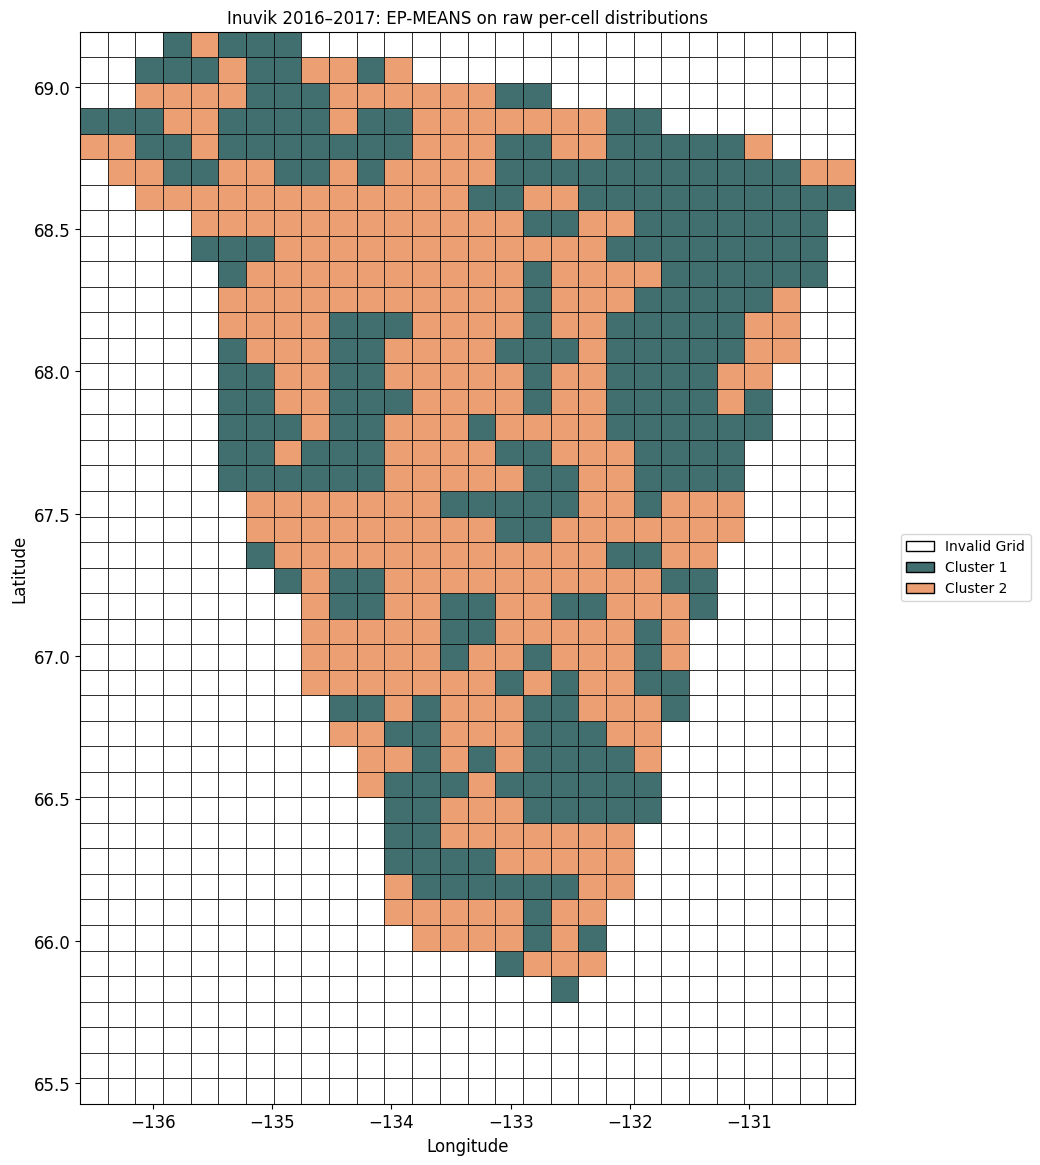

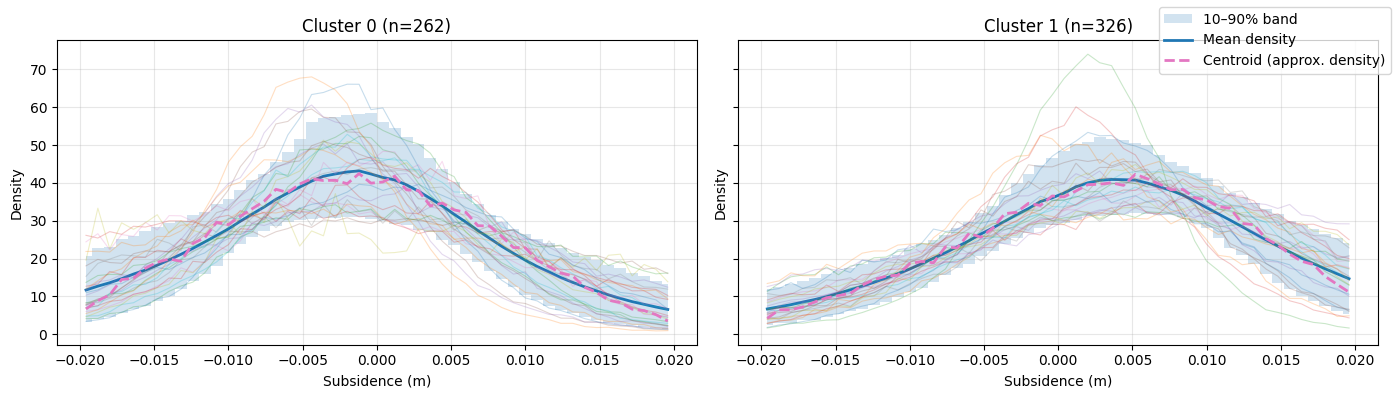

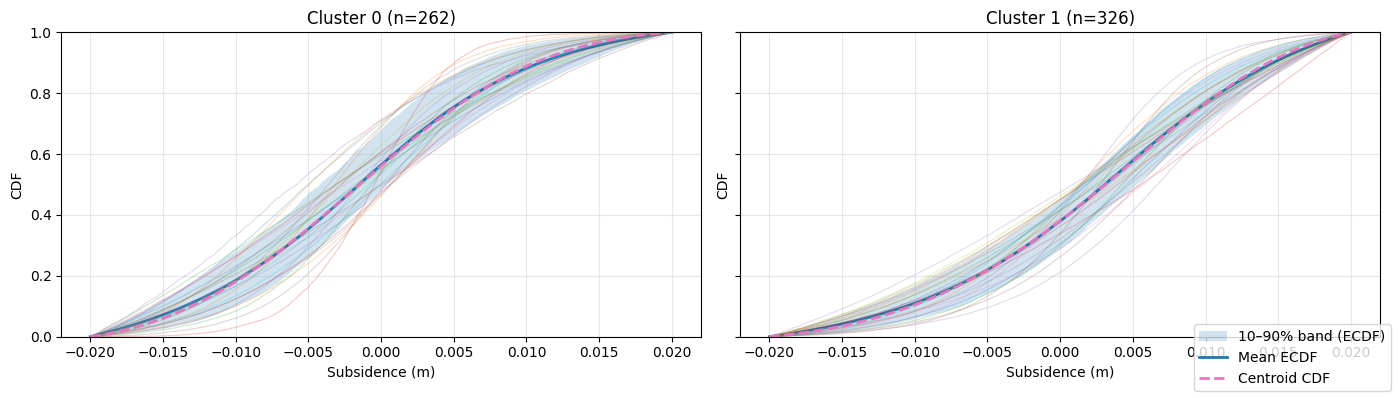

Inuvik 2016–2017 – EP-MEANS – Cluster 0 (n=262)
  mean (m):     [-0.0063, 0.0007]
  std  (m):     [0.0047, 0.0111]
  skew (unit):  [-0.224, 0.555]
  kurt (unit):  [1.916, 3.750]  (Pearson)

Inuvik 2016–2017 – EP-MEANS – Cluster 1 (n=326)
  mean (m):     [0.0004, 0.0069]
  std  (m):     [0.0050, 0.0112]
  skew (unit):  [-0.691, 0.018]
  kurt (unit):  [1.872, 3.910]  (Pearson)



In [68]:
subsidence, lons, lats, xyz = prepare_subsidence_data(
    'invk', '201617', 'orgsub', min_value=-0.02, max_value=0.02
)
grid = create_km_grid(lons, lats, resolution_km=10)

# 1) Collect raw samples per grid cell (only keep cells with enough points)
samples_list, valid_mask, counts = collect_cell_samples(
    grid=grid, data=xyz, threshold=6000
)
print(f"Valid cells: {valid_mask.sum()} / {len(grid)}")


k = 2
qs = np.linspace(0, 1, 257)           # quantile grid (includes 0 and 1)
ep = EPMEANS(
    n_clusters=k,
    qs=qs,
    max_iter=100,
    tol=1e-4,
    random_state=42,                   # reproducibility
    clip=(-0.02, 0.02),               # optional physical clip (keeps units)
    reinit_empty=True
)
ep.fit(samples_list)                   # <- pass the *list of arrays* directly

# 3) Map cluster labels back to the full grid


labels_valid = _labels_from(ep)        # length == number of valid cells

labels_full = np.full(len(grid), -1, dtype=int)
labels_full[valid_mask] = labels_valid

# 4) Convert to your display codes and visualize
code_map = {0: 111, 1: 222, 2: 333, 3: 444}
display_vals = np.full(len(grid), np.nan, dtype=float)
for gi, lab in enumerate(labels_full):
    if lab >= 0:
        display_vals[gi] = code_map.get(lab, 999)

nrows = len(sorted(set(c[2] for c in grid)))   # unique lat starts
ncols = len(sorted(set(c[0] for c in grid)))   # unique lon starts
visualise_updated_grid(
    grid_shape=np.zeros((nrows, ncols)),
    grid_info=grid,
    data_counts=display_vals,
    title="Inuvik 2016–2017: EP-MEANS on raw per-cell distributions"
)


# labels over valid cells (same order as samples_list from collect_cell_samples)
labels_valid = ep.labels_ if hasattr(ep, "labels_") else ep.assignments

# good practice to use your physical range
rng = (-0.02, 0.02)

# 1) Density summary per cluster
plot_cluster_distributions_from_samples(
    samples_list=samples_list,
    labels=labels_valid,
    bins=50,
    rng=rng,
    n_examples=25,
    centroid_qs=getattr(ep, "qs", None),
    centroids=getattr(ep, "centroids_", None)  # quantile centroids
)

# 2) ECDF summary per cluster (+ exact centroid CDF)
plot_cluster_ecdfs_from_samples(
    samples_list=samples_list,
    labels=labels_valid,
    rng=rng,
    n_examples=25,
    centroid_qs=getattr(ep, "qs", None),
    centroids=getattr(ep, "centroids_", None)
)

# 3) Moment summary per cluster
summarize_cluster_moments_from_samples(
    samples_list=samples_list,                 # raw per-cell distributions
    labels=labels_valid,                       # ep.labels_ or ep.assignments
    title_prefix="Inuvik 2016–2017 – EP-MEANS – ",
    clip=(-0.02, 0.02)                         # optional; matches your fit()
)


Valid cells: 589 / 1176


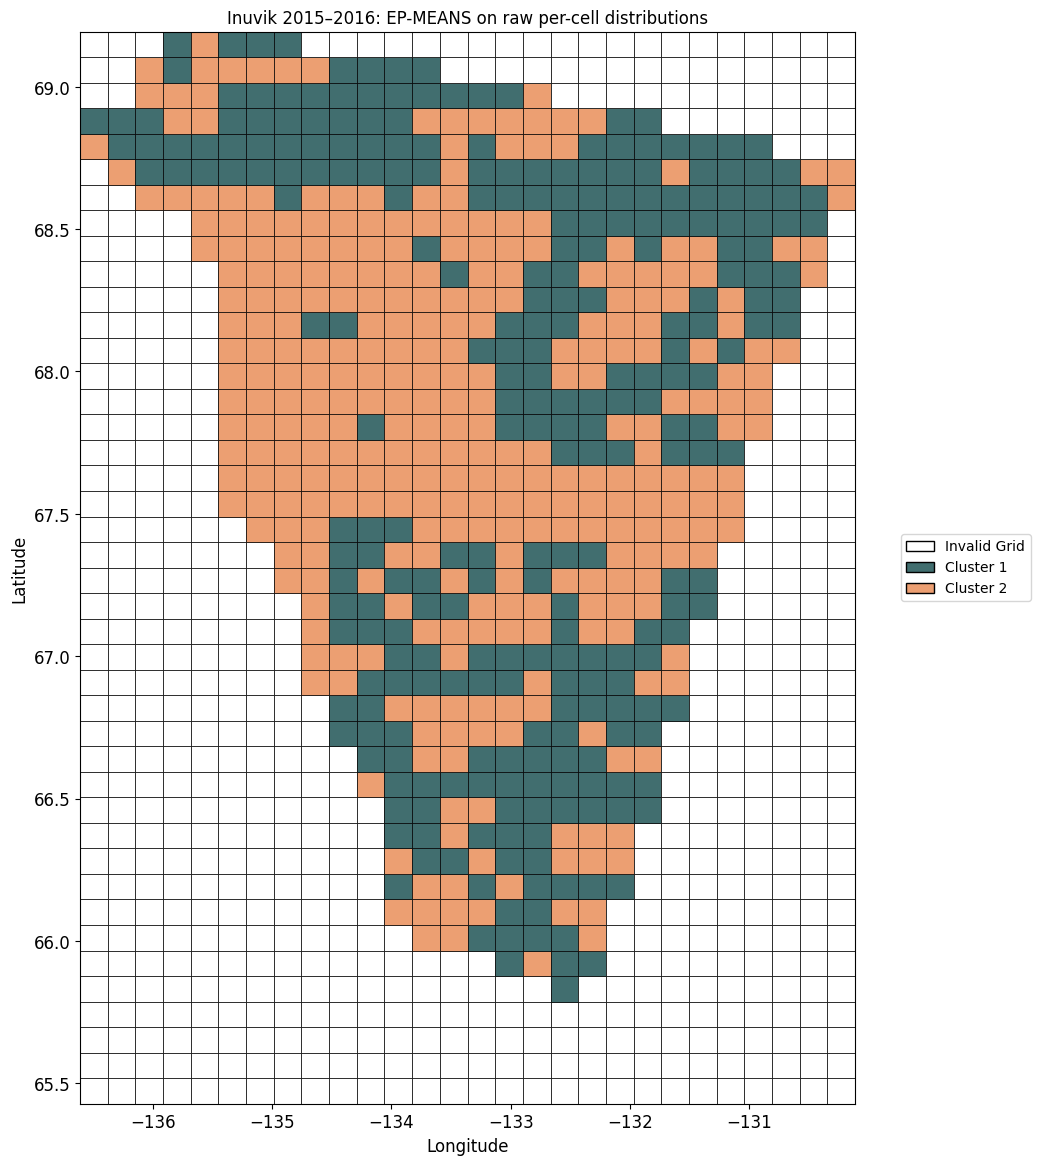

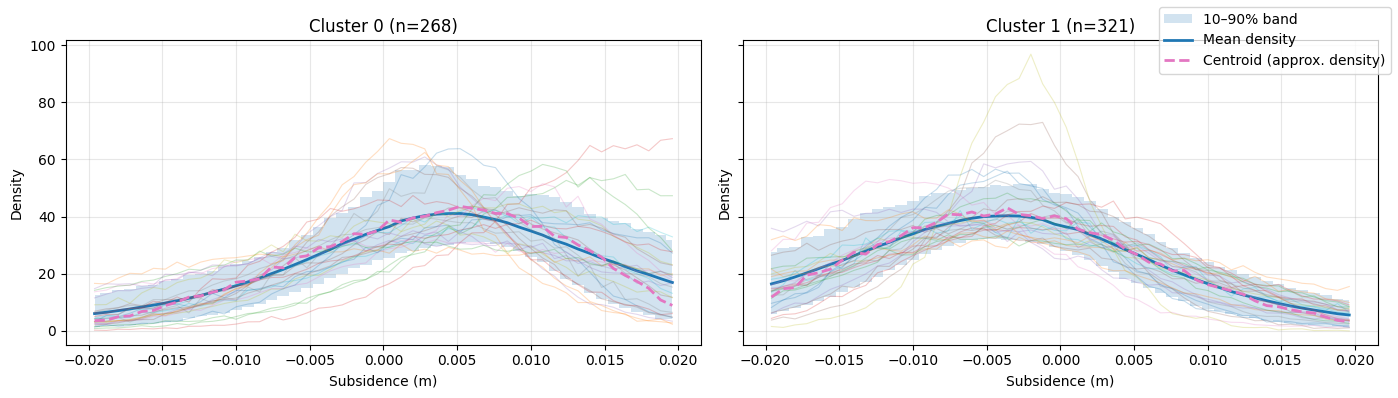

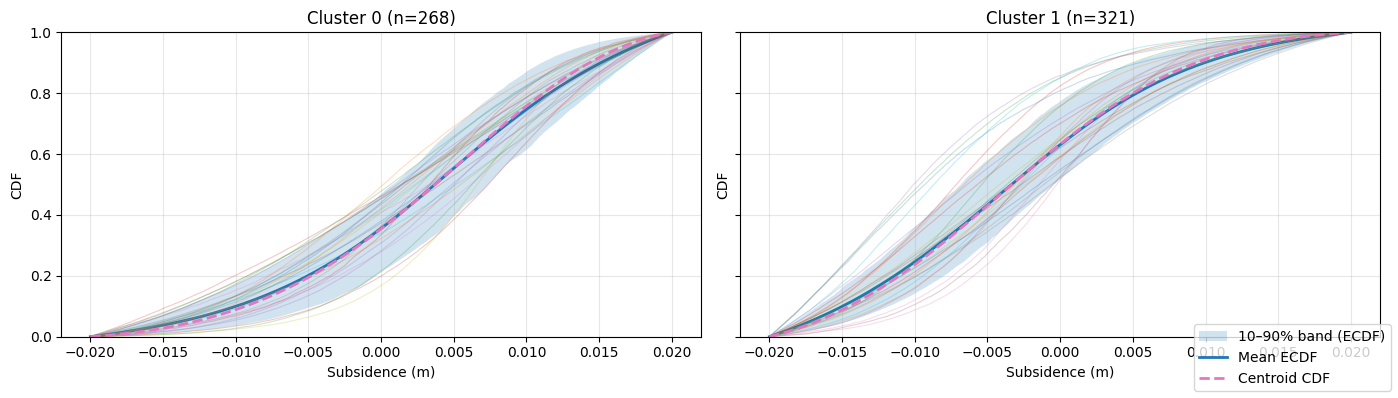

Inuvik 2015–2016 – EP-MEANS – Cluster 0 (n=268)
  mean (m):     [0.0000, 0.0107]
  std  (m):     [0.0060, 0.0112]
  skew (unit):  [-1.115, 0.021]
  kurt (unit):  [1.893, 4.006]  (Pearson)

Inuvik 2015–2016 – EP-MEANS – Cluster 1 (n=321)
  mean (m):     [-0.0096, 0.0000]
  std  (m):     [0.0049, 0.0108]
  skew (unit):  [-0.292, 1.059]
  kurt (unit):  [1.900, 4.290]  (Pearson)



In [69]:
subsidence, lons, lats, xyz = prepare_subsidence_data(
    'invk', '201516', 'orgsub', min_value=-0.02, max_value=0.02
)
grid = create_km_grid(lons, lats, resolution_km=10)

# 1) Collect raw samples per grid cell (only keep cells with enough points)
samples_list, valid_mask, counts = collect_cell_samples(
    grid=grid, data=xyz, threshold=6000
)
print(f"Valid cells: {valid_mask.sum()} / {len(grid)}")


k = 2
qs = np.linspace(0, 1, 257)           # quantile grid (includes 0 and 1)
ep = EPMEANS(
    n_clusters=k,
    qs=qs,
    max_iter=100,
    tol=1e-4,
    random_state=42,                   # reproducibility
    clip=(-0.02, 0.02),               # optional physical clip (keeps units)
    reinit_empty=True
)
ep.fit(samples_list)                   # <- pass the *list of arrays* directly

# 3) Map cluster labels back to the full grid


labels_valid = _labels_from(ep)        # length == number of valid cells

labels_full = np.full(len(grid), -1, dtype=int)
labels_full[valid_mask] = labels_valid

# 4) Convert to your display codes and visualize
code_map = {0: 111, 1: 222, 2: 333, 3: 444}
display_vals = np.full(len(grid), np.nan, dtype=float)
for gi, lab in enumerate(labels_full):
    if lab >= 0:
        display_vals[gi] = code_map.get(lab, 999)

nrows = len(sorted(set(c[2] for c in grid)))   # unique lat starts
ncols = len(sorted(set(c[0] for c in grid)))   # unique lon starts
visualise_updated_grid(
    grid_shape=np.zeros((nrows, ncols)),
    grid_info=grid,
    data_counts=display_vals,
    title="Inuvik 2015–2016: EP-MEANS on raw per-cell distributions"
)



# labels over valid cells (same order as samples_list from collect_cell_samples)
labels_valid = ep.labels_ if hasattr(ep, "labels_") else ep.assignments

# good practice to use your physical range
rng = (-0.02, 0.02)

# 1) Density summary per cluster
plot_cluster_distributions_from_samples(
    samples_list=samples_list,
    labels=labels_valid,
    bins=50,
    rng=rng,
    n_examples=25,
    centroid_qs=getattr(ep, "qs", None),
    centroids=getattr(ep, "centroids_", None)  # quantile centroids
)

# 2) ECDF summary per cluster (+ exact centroid CDF)
plot_cluster_ecdfs_from_samples(
    samples_list=samples_list,
    labels=labels_valid,
    rng=rng,
    n_examples=25,
    centroid_qs=getattr(ep, "qs", None),
    centroids=getattr(ep, "centroids_", None)
)

summarize_cluster_moments_from_samples(
    samples_list=samples_list,                 # raw per-cell distributions
    labels=labels_valid,                       # ep.labels_ or ep.assignments
    title_prefix="Inuvik 2015–2016 – EP-MEANS – ",
    clip=(-0.02, 0.02)                         # optional; matches your fit()
)


Valid cells: 589 / 1176


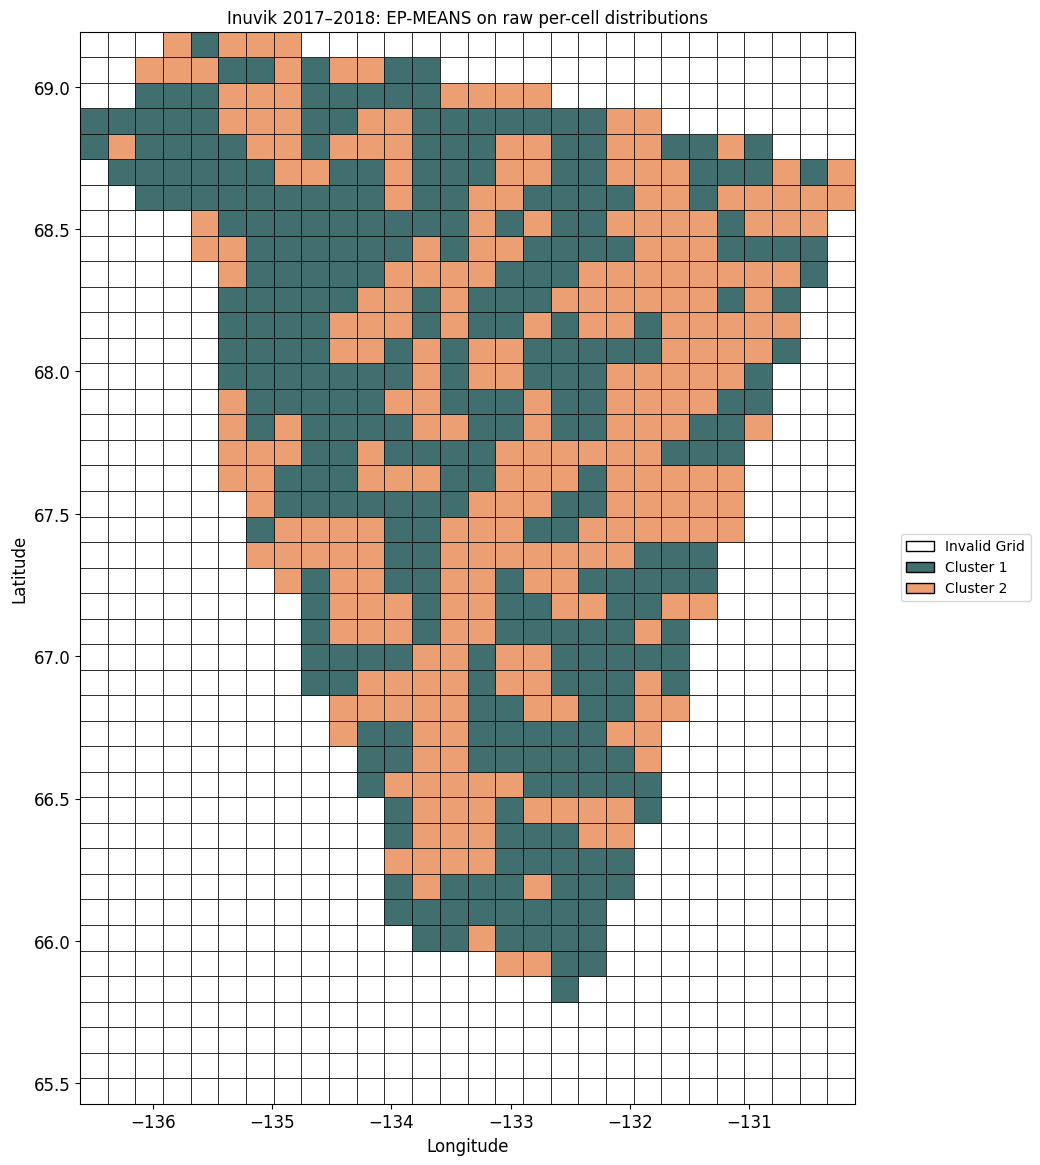

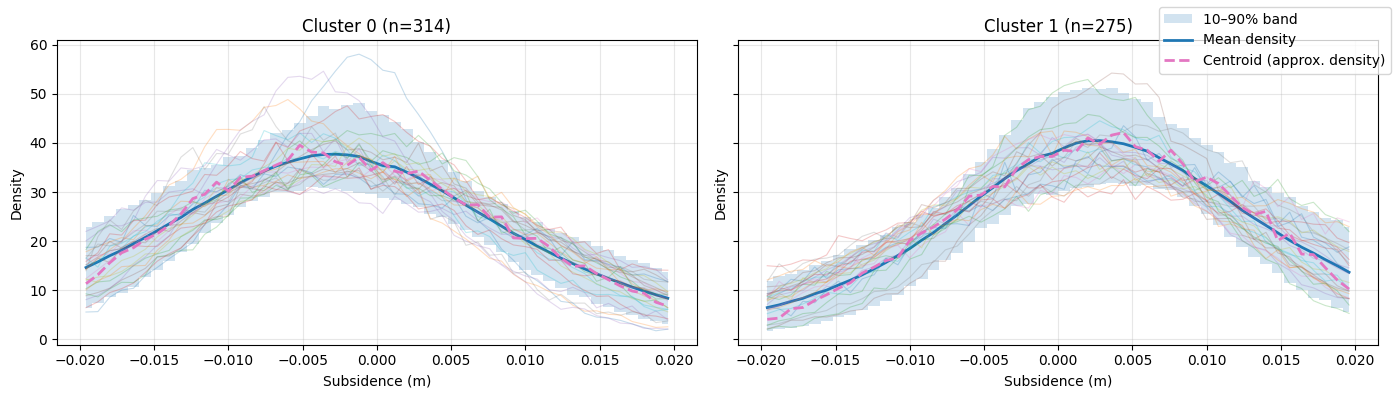

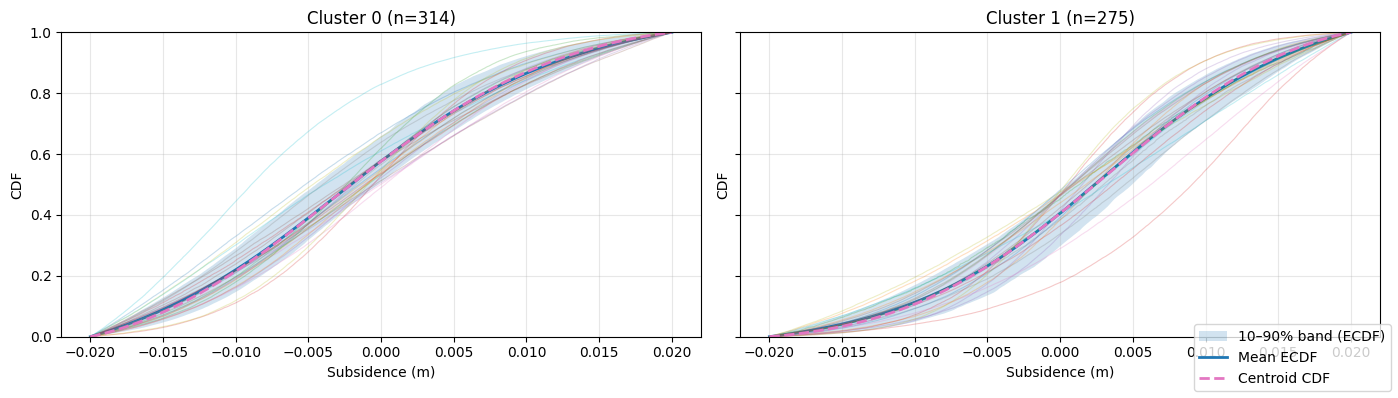

Inuvik 2017–2018 – EP-MEANS – Cluster 0 (n=314)
  mean (m):     [-0.0076, 0.0002]
  std  (m):     [0.0065, 0.0109]
  skew (unit):  [-0.055, 0.785]
  kurt (unit):  [1.910, 3.384]  (Pearson)

Inuvik 2017–2018 – EP-MEANS – Cluster 1 (n=275)
  mean (m):     [-0.0003, 0.0095]
  std  (m):     [0.0049, 0.0109]
  skew (unit):  [-1.121, 0.137]
  kurt (unit):  [1.911, 3.972]  (Pearson)



In [70]:
subsidence, lons, lats, xyz = prepare_subsidence_data(
    'invk', '201718', 'orgsub', min_value=-0.02, max_value=0.02
)
grid = create_km_grid(lons, lats, resolution_km=10)

# 1) Collect raw samples per grid cell (only keep cells with enough points)
samples_list, valid_mask, counts = collect_cell_samples(
    grid=grid, data=xyz, threshold=6000
)
print(f"Valid cells: {valid_mask.sum()} / {len(grid)}")


k = 2
qs = np.linspace(0, 1, 257)           # quantile grid (includes 0 and 1)
ep = EPMEANS(
    n_clusters=k,
    qs=qs,
    max_iter=100,
    tol=1e-4,
    random_state=42,                   # reproducibility
    clip=(-0.02, 0.02),               # optional physical clip (keeps units)
    reinit_empty=True
)
ep.fit(samples_list)                   # <- pass the *list of arrays* directly

# 3) Map cluster labels back to the full grid


labels_valid = _labels_from(ep)        # length == number of valid cells

labels_full = np.full(len(grid), -1, dtype=int)
labels_full[valid_mask] = labels_valid

# 4) Convert to your display codes and visualize
code_map = {0: 111, 1: 222, 2: 333, 3: 444}
display_vals = np.full(len(grid), np.nan, dtype=float)
for gi, lab in enumerate(labels_full):
    if lab >= 0:
        display_vals[gi] = code_map.get(lab, 999)

nrows = len(sorted(set(c[2] for c in grid)))   # unique lat starts
ncols = len(sorted(set(c[0] for c in grid)))   # unique lon starts
visualise_updated_grid(
    grid_shape=np.zeros((nrows, ncols)),
    grid_info=grid,
    data_counts=display_vals,
    title="Inuvik 2017–2018: EP-MEANS on raw per-cell distributions"
)


# labels over valid cells (same order as samples_list from collect_cell_samples)
labels_valid = ep.labels_ if hasattr(ep, "labels_") else ep.assignments

# good practice to use your physical range
rng = (-0.02, 0.02)

# 1) Density summary per cluster
plot_cluster_distributions_from_samples(
    samples_list=samples_list,
    labels=labels_valid,
    bins=50,
    rng=rng,
    n_examples=25,
    centroid_qs=getattr(ep, "qs", None),
    centroids=getattr(ep, "centroids_", None)  # quantile centroids
)

# 2) ECDF summary per cluster (+ exact centroid CDF)
plot_cluster_ecdfs_from_samples(
    samples_list=samples_list,
    labels=labels_valid,
    rng=rng,
    n_examples=25,
    centroid_qs=getattr(ep, "qs", None),
    centroids=getattr(ep, "centroids_", None)
)

summarize_cluster_moments_from_samples(
    samples_list=samples_list,                 # raw per-cell distributions
    labels=labels_valid,                       # ep.labels_ or ep.assignments
    title_prefix="Inuvik 2017–2018 – EP-MEANS – ",
    clip=(-0.02, 0.02)                         # optional; matches your fit()
)



In [ ]:
# ==============================
#   K-MEANS ON FIXED-BIN HISTOGRAMS
# ==============================


def _normalize_rows(H, eps=1e-12):
    H = np.asarray(H, dtype=float)
    H = np.clip(H, 0, np.inf)
    row_sum = H.sum(axis=1, keepdims=True)
    return H / np.maximum(row_sum, eps)

Grid (-132.67, -132.43, 65.79, 65.88): min=-0.0200, max=0.0200, points=11953
Grid (-133.13, -132.90, 65.88, 65.97): min=-0.0200, max=0.0200, points=35483
Grid (-132.90, -132.67, 65.88, 65.97): min=-0.0200, max=0.0200, points=67552
Grid (-132.67, -132.43, 65.88, 65.97): min=-0.0200, max=0.0200, points=67642
Grid (-132.43, -132.20, 65.88, 65.97): min=-0.0200, max=0.0200, points=26451
Grid (-133.83, -133.59, 65.97, 66.06): min=-0.0200, max=0.0200, points=18136
Grid (-133.59, -133.36, 65.97, 66.06): min=-0.0200, max=0.0200, points=71377
Grid (-133.36, -133.13, 65.97, 66.06): min=-0.0200, max=0.0200, points=89429
Grid (-133.13, -132.90, 65.97, 66.06): min=-0.0200, max=0.0200, points=86493
Grid (-132.90, -132.67, 65.97, 66.06): min=-0.0200, max=0.0200, points=89576
Grid (-132.67, -132.43, 65.97, 66.06): min=-0.0200, max=0.0200, points=78597
Grid (-132.43, -132.20, 65.97, 66.06): min=-0.0200, max=0.0200, points=61690
Grid (-134.06, -133.83, 66.06, 66.15): min=-0.0200, max=0.0200, points=97442

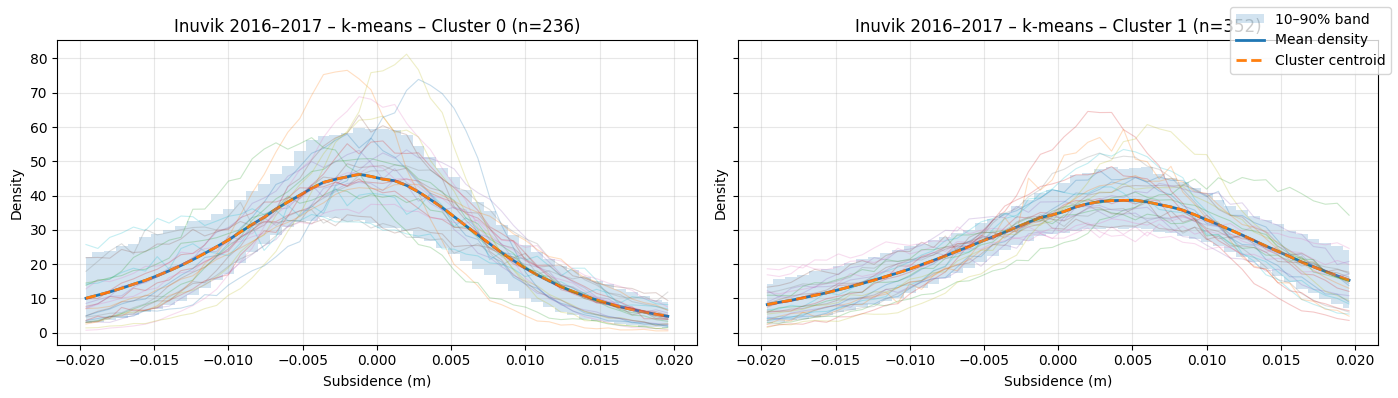

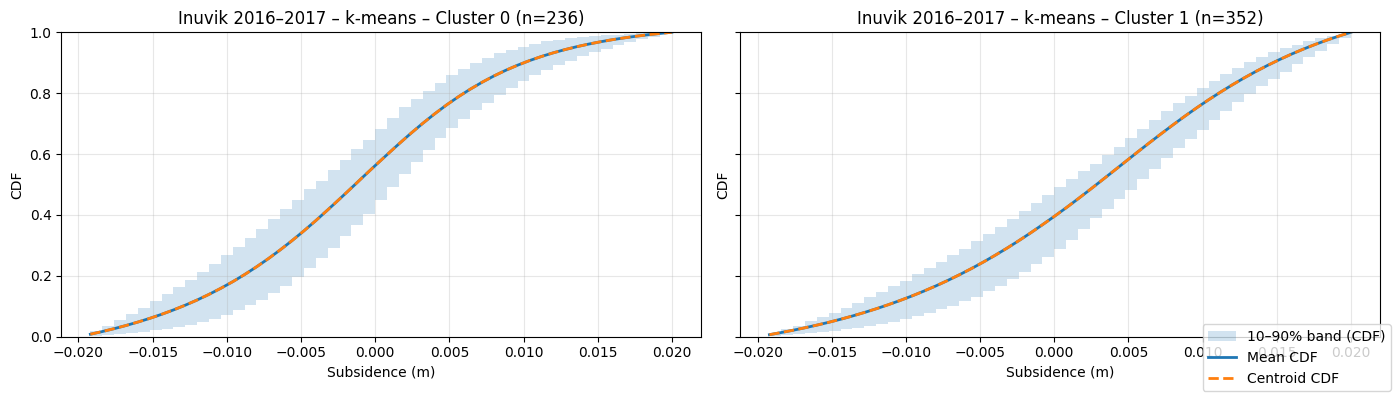

Inuvik 2016–2017 – k-means – Cluster 0 (n=236)
  mean (m):     [-0.0063, 0.0019]
  std  (m):     [0.0047, 0.0111]
  skew (unit):  [-0.544, 0.556]
  kurt (unit):  [1.968, 3.776]  (Pearson)

Inuvik 2016–2017 – k-means – Cluster 1 (n=352)
  mean (m):     [-0.0017, 0.0069]
  std  (m):     [0.0050, 0.0112]
  skew (unit):  [-0.692, 0.178]
  kurt (unit):  [1.871, 3.904]  (Pearson)



In [72]:


# --- 1) Build grid + histograms with a single global binning ---
subsidence, lons, lats, zip_masked = prepare_subsidence_data(
    'invk', '201617', 'orgsub',
    min_value=-0.02, max_value=0.02
)
grid = create_km_grid(lons, lats, resolution_km=10)

bins = 50
min_val, max_val = -0.02, 0.02
threshold = 6000

H, data_counts, valid_idx = bin_valid_data(
    grid=grid, data=zip_masked,
    bins=bins, min_val=min_val, max_val=max_val,
    threshold=threshold
)
# H rows for invalid cells are NaNs by design; valid cells are in valid_idx

# --- 2) Convert density histograms -> per-bin probabilities (so rows ~ sum to 1) ---
bin_edges = np.linspace(min_val, max_val, bins + 1)
bin_width = bin_edges[1] - bin_edges[0]

valid_mask = np.zeros(len(grid), dtype=bool)
valid_mask[valid_idx] = True

H_valid = H[valid_mask]                 # shape: (n_valid, bins), density=True
H_valid = np.clip(H_valid, 0, np.inf)   # safety
H_prob  = H_valid * bin_width           # densities -> per-bin probabilities
H_prob  = _normalize_rows(H_prob)       # numerical safety

# --- 3) Proper k-means (Euclidean) on histogram probability vectors ---
k = 2
km = KMeans(n_clusters=k, init="k-means++", random_state=42, n_init="auto")
km.fit(H_prob)

# --- after km.fit(H_prob) ---
labels_valid = km.labels_                    # ensure labels align with this run
# (optional) guard to catch mismatches early
assert H_prob.shape[0] == len(labels_valid), \
    f"rows(H_prob)={H_prob.shape[0]} vs labels={len(labels_valid)}"

# Make k-means results plottable in the same style as EP/hybrid
H_dens = H_prob / bin_width                  # prob / width -> density
centroids_prob = km.cluster_centers_
centroids_dens = centroids_prob / bin_width

# (optional) guard for plotting arrays too
assert H_dens.shape[0] == len(labels_valid), \
    f"rows(H_dens)={H_dens.shape[0]} vs labels={len(labels_valid)}"

# --- Per-cluster histogram shapes (same style as EP/hybrid) ---
plot_cluster_histograms(
    H=H_dens,
    labels=labels_valid,
    bin_edges=bin_edges,
    centroids=centroids_dens,
    n_examples=25,
    example_alpha=0.25,
    title_prefix="Inuvik 2016–2017 – k-means – "
)

# --- CDF view ---
plot_cluster_cdfs(
    H=H_dens,
    labels=labels_valid,
    bin_edges=bin_edges,
    centroids=centroids_dens,
    title_prefix="Inuvik 2016–2017 – k-means – "
)

# --- Moments: compute from the *same* H you clustered/plot (densities) ---
summarize_cluster_moments(
    H=H_dens,                # <-- not valid_histograms_1617
    labels=labels_valid,
    bin_edges=bin_edges,
    from_density=True,
    title_prefix="Inuvik 2016–2017 – k-means – "
)






Grid (-132.67, -132.43, 65.79, 65.88): min=-0.0200, max=0.0200, points=11236
Grid (-133.13, -132.90, 65.88, 65.97): min=-0.0200, max=0.0200, points=31247
Grid (-132.90, -132.67, 65.88, 65.97): min=-0.0200, max=0.0200, points=62478
Grid (-132.67, -132.43, 65.88, 65.97): min=-0.0200, max=0.0200, points=56249
Grid (-132.43, -132.20, 65.88, 65.97): min=-0.0200, max=0.0200, points=15962
Grid (-133.83, -133.59, 65.97, 66.06): min=-0.0200, max=0.0200, points=17781
Grid (-133.59, -133.36, 65.97, 66.06): min=-0.0200, max=0.0200, points=70138
Grid (-133.36, -133.13, 65.97, 66.06): min=-0.0200, max=0.0200, points=81757
Grid (-133.13, -132.90, 65.97, 66.06): min=-0.0200, max=0.0200, points=67570
Grid (-132.90, -132.67, 65.97, 66.06): min=-0.0200, max=0.0200, points=59350
Grid (-132.67, -132.43, 65.97, 66.06): min=-0.0200, max=0.0200, points=54996
Grid (-132.43, -132.20, 65.97, 66.06): min=-0.0200, max=0.0200, points=52380
Grid (-134.06, -133.83, 66.06, 66.15): min=-0.0200, max=0.0200, points=90775

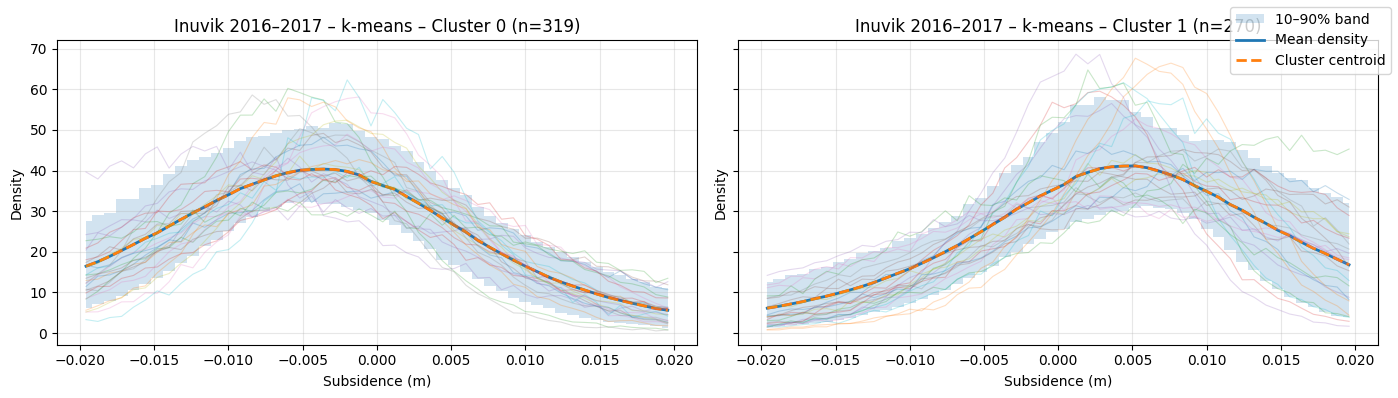

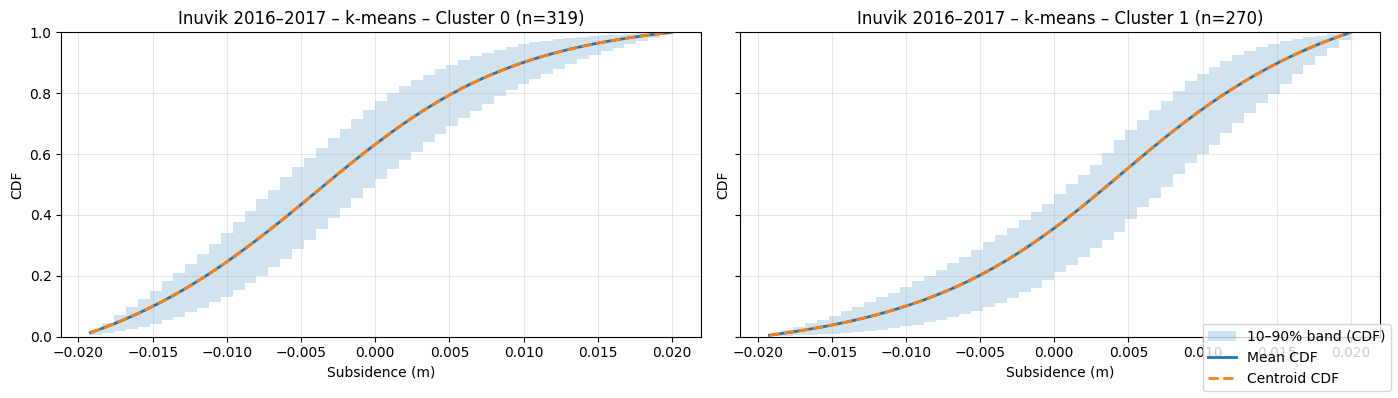

Inuvik 2015–2016 – k-means – Cluster 0 (n=319)
  mean (m):     [-0.0096, 0.0003]
  std  (m):     [0.0049, 0.0108]
  skew (unit):  [-0.190, 1.059]
  kurt (unit):  [1.949, 4.285]  (Pearson)

Inuvik 2015–2016 – k-means – Cluster 1 (n=270)
  mean (m):     [-0.0003, 0.0107]
  std  (m):     [0.0060, 0.0112]
  skew (unit):  [-1.116, 0.010]
  kurt (unit):  [1.892, 4.009]  (Pearson)



In [74]:
# --- 1) Build grid + histograms with a single global binning ---
subsidence, lons, lats, zip_masked = prepare_subsidence_data(
    'invk', '201516', 'orgsub',
    min_value=-0.02, max_value=0.02
)
grid = create_km_grid(lons, lats, resolution_km=10)

bins = 50
min_val, max_val = -0.02, 0.02
threshold = 6000

H, data_counts, valid_idx = bin_valid_data(
    grid=grid, data=zip_masked,
    bins=bins, min_val=min_val, max_val=max_val,
    threshold=threshold
)

# --- 2) Convert density histograms -> per-bin probabilities ---
bin_edges = np.linspace(min_val, max_val, bins + 1)
bin_width = bin_edges[1] - bin_edges[0]

# Robust selection of valid rows
H_valid = H[valid_idx]                     # use integer indices (no shape mismatch)
H_valid = np.clip(H_valid, 0, np.inf)
H_prob  = H_valid * bin_width
row_sums = H_prob.sum(axis=1, keepdims=True)
H_prob   = np.divide(H_prob, np.maximum(row_sums, 1e-12))    # _normalize_rows

# --- 3) k-means on probability vectors ---
k = 2
km = KMeans(n_clusters=k, init="k-means++", random_state=42, n_init="auto")
km.fit(H_prob)
labels_valid = km.labels_                    # ensure labels align with this run
# (optional) guard to catch mismatches early
assert H_prob.shape[0] == len(labels_valid), \
    f"rows(H_prob)={H_prob.shape[0]} vs labels={len(labels_valid)}"

# Make k-means results plottable in the same style as EP/hybrid
H_dens = H_prob / bin_width                  # prob / width -> density
centroids_prob = km.cluster_centers_
centroids_dens = centroids_prob / bin_width

# (optional) guard for plotting arrays too
assert H_dens.shape[0] == len(labels_valid), \
    f"rows(H_dens)={H_dens.shape[0]} vs labels={len(labels_valid)}"

# --- Per-cluster histogram shapes (same style as EP/hybrid) ---
plot_cluster_histograms(
    H=H_dens,
    labels=labels_valid,
    bin_edges=bin_edges,
    centroids=centroids_dens,
    n_examples=25,
    example_alpha=0.25,
    title_prefix="Inuvik 2016–2017 – k-means – "
)

# --- CDF view ---
plot_cluster_cdfs(
    H=H_dens,
    labels=labels_valid,
    bin_edges=bin_edges,
    centroids=centroids_dens,
    title_prefix="Inuvik 2016–2017 – k-means – "
)

# --- Moments: compute from the *same* H you clustered/plot (densities) ---
summarize_cluster_moments(
    H=H_dens,                # <-- not valid_histograms_1617
    labels=labels_valid,
    bin_edges=bin_edges,
    from_density=True,
    title_prefix="Inuvik 2015–2016 – k-means – "
)

Grid (-132.67, -132.43, 65.79, 65.88): min=-0.0200, max=0.0200, points=11809
Grid (-133.13, -132.90, 65.88, 65.97): min=-0.0200, max=0.0200, points=34622
Grid (-132.90, -132.67, 65.88, 65.97): min=-0.0200, max=0.0200, points=69269
Grid (-132.67, -132.43, 65.88, 65.97): min=-0.0200, max=0.0200, points=68111
Grid (-132.43, -132.20, 65.88, 65.97): min=-0.0200, max=0.0200, points=25625
Grid (-133.83, -133.59, 65.97, 66.06): min=-0.0200, max=0.0200, points=18607
Grid (-133.59, -133.36, 65.97, 66.06): min=-0.0200, max=0.0200, points=73750
Grid (-133.36, -133.13, 65.97, 66.06): min=-0.0200, max=0.0200, points=90564
Grid (-133.13, -132.90, 65.97, 66.06): min=-0.0200, max=0.0200, points=88461
Grid (-132.90, -132.67, 65.97, 66.06): min=-0.0200, max=0.0200, points=87205
Grid (-132.67, -132.43, 65.97, 66.06): min=-0.0200, max=0.0200, points=79247
Grid (-132.43, -132.20, 65.97, 66.06): min=-0.0200, max=0.0200, points=63488
Grid (-134.06, -133.83, 66.06, 66.15): min=-0.0200, max=0.0200, points=99415

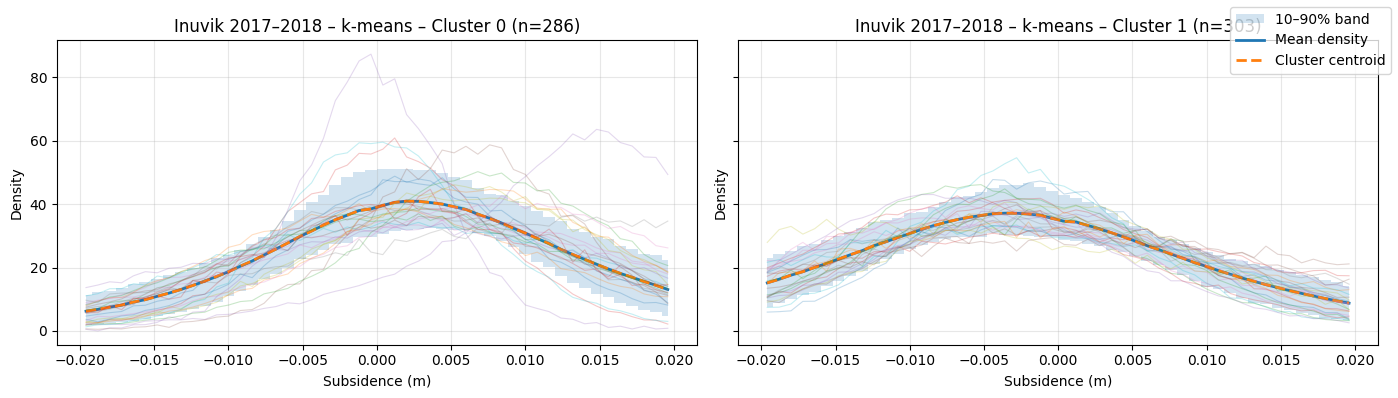

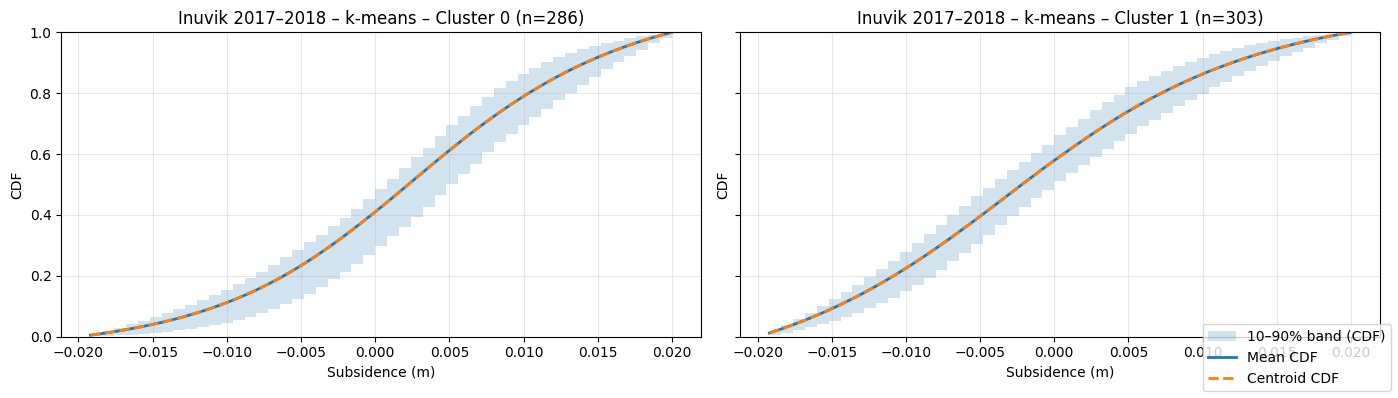

Inuvik 2017–2018 – k-means – Cluster 0 (n=286)
  mean (m):     [-0.0005, 0.0095]
  std  (m):     [0.0049, 0.0109]
  skew (unit):  [-1.121, 0.136]
  kurt (unit):  [1.910, 3.970]  (Pearson)

Inuvik 2017–2018 – k-means – Cluster 1 (n=303)
  mean (m):     [-0.0076, 0.0008]
  std  (m):     [0.0065, 0.0109]
  skew (unit):  [-0.075, 0.786]
  kurt (unit):  [1.908, 3.384]  (Pearson)



In [75]:
# --- 1) Build grid + histograms with a single global binning ---
subsidence, lons, lats, zip_masked = prepare_subsidence_data(
    'invk', '201718', 'orgsub',
    min_value=-0.02, max_value=0.02
)
grid = create_km_grid(lons, lats, resolution_km=10)

bins = 50
min_val, max_val = -0.02, 0.02
threshold = 6000

H, data_counts, valid_idx = bin_valid_data(
    grid=grid, data=zip_masked,
    bins=bins, min_val=min_val, max_val=max_val,
    threshold=threshold
)

# --- 2) Convert density histograms -> per-bin probabilities ---
bin_edges = np.linspace(min_val, max_val, bins + 1)
bin_width = bin_edges[1] - bin_edges[0]

# Robust selection of valid rows
H_valid = H[valid_idx]                     # use integer indices (no shape mismatch)
H_valid = np.clip(H_valid, 0, np.inf)
H_prob  = H_valid * bin_width
row_sums = H_prob.sum(axis=1, keepdims=True)
H_prob   = np.divide(H_prob, np.maximum(row_sums, 1e-12))    # _normalize_rows

# --- 3) k-means on probability vectors ---
k = 2
km = KMeans(n_clusters=k, init="k-means++", random_state=42, n_init="auto")
km.fit(H_prob)
labels_valid = km.labels_                    # ensure labels align with this run
# (optional) guard to catch mismatches early
assert H_prob.shape[0] == len(labels_valid), \
    f"rows(H_prob)={H_prob.shape[0]} vs labels={len(labels_valid)}"

# Make k-means results plottable in the same style as EP/hybrid
H_dens = H_prob / bin_width                  # prob / width -> density
centroids_prob = km.cluster_centers_
centroids_dens = centroids_prob / bin_width

# (optional) guard for plotting arrays too
assert H_dens.shape[0] == len(labels_valid), \
    f"rows(H_dens)={H_dens.shape[0]} vs labels={len(labels_valid)}"

# --- Per-cluster histogram shapes (same style as EP/hybrid) ---
plot_cluster_histograms(
    H=H_dens,
    labels=labels_valid,
    bin_edges=bin_edges,
    centroids=centroids_dens,
    n_examples=25,
    example_alpha=0.25,
    title_prefix="Inuvik 2017–2018 – k-means – "
)

# --- CDF view ---
plot_cluster_cdfs(
    H=H_dens,
    labels=labels_valid,
    bin_edges=bin_edges,
    centroids=centroids_dens,
    title_prefix="Inuvik 2017–2018 – k-means – "
)

# --- Moments: compute from the *same* H you clustered/plot (densities) ---
summarize_cluster_moments(
    H=H_dens,                # <-- not valid_histograms_1617
    labels=labels_valid,
    bin_edges=bin_edges,
    from_density=True,
    title_prefix="Inuvik 2017–2018 – k-means – "
)